# Анализ маркетинговых показателей развлекательного приложения Procrastinate Pro+.

## Описание данных.


Последние несколько месяцев компания терпит убытки, несмотря на огромные вложения в рекламу развлекательного приложения Procrastinate Pro+. 


**Цель исследования:**

Разобраться в причинах убытков компании и помочь ей выйти в плюс в ходе изучения следующих вопросов:

- откуда приходят пользователи и какими устройствами они пользуются,

- сколько стоит привлечение пользователей из различных рекламных каналов;

- сколько денег приносит каждый клиент,

- когда расходы на привлечение клиента окупаются,

- какие факторы мешают привлечению клиентов.


**Ход исследования:**

Будут открыты и проанализировны имеющиеся данные, определено качество выборки, наличие дубликатов, ошибок. За тем, произведем расчет дополнительных параметров, проведем исследовательский анализ данных.

Так будут пройдены следующие этапы анализа данных:

- Обзор данных
- Предобработка данных
- Проведение исследовательского анализа данных
- Расчет и оценка маркетинговых показателей
- Написание общего вывода


**Описание данных**

Имеются данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

- лог сервера с данными об их посещениях,

- выгрузка их покупок за этот период,

- рекламные расходы.


В нашем распоряжении три датасета. 
Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.

Структура `visits_info_short.csv`:

`User Id` — уникальный идентификатор пользователя,

`Region` — страна пользователя,

`Device` — тип устройства пользователя,

`Channel` — идентификатор источника перехода,

`Session Start` — дата и время начала сессии,

`Session End` — дата и время окончания сессии.

Структура `orders_info_short.csv`:

`User Id` — уникальный идентификатор пользователя,

`Event Dt` — дата и время покупки,

`Revenue` — сумма заказа.

Структура `costs_info_short.csv`:

`dt` — дата проведения рекламной кампании,

`Channel`— идентификатор рекламного источника,

`costs` — расходы на эту кампанию.

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Хорошо, что есть описание и цели проекта.
</div>

## Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.
Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

### Загрузка данных

Импортируем необходимые библиотеки

In [43]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from IPython.display import display, Markdown

Откроем файлы и выведем исходник таблицы на экран для изучения.

In [44]:
visits, orders, costs = (
    pd.read_csv('/Volumes/Vika/Analize_new_proffesion/Для гит хаба/for_git_hab/исх/visits_info_short.csv', parse_dates=['Session Start','Session End']),  # журнал сессий
    pd.read_csv('/Volumes/Vika/Analize_new_proffesion/Для гит хаба/for_git_hab/исх/orders_info_short.csv', parse_dates=['Event Dt']),  # покупки
    pd.read_csv('/Volumes/Vika/Analize_new_proffesion/Для гит хаба/for_git_hab/исх/costs_info_short.csv' , parse_dates=['dt'])  # траты на рекламу
)

Выведем на экран общую информацию о таблице **`visits`** с помощью метода  ***info()*** и саму таблицу.

In [45]:
#Функция для вывода информации
def start_info(name,df):
    df                                   
    print('\n\n',name)
    display(df.head(5))
    print()
    df.info()
    
start_info('Журнал сессий',visits)



 Журнал сессий


User Id         Region   Device  Channel       Session Start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          Session End  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   User Id        309901 non-null  int64         
 1   Region         309901 non-null  object        
 2   Device         309901 non-null  object        
 3   Channel        309901 non-null  object        
 4   Session Start  309901 non-null  datetime64[ns]
 5   Session End    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


В данных отсутствуют пропуски, однако наименования столбцов не соответствуют принитому формату.

In [46]:
start_info('Информация о покупках',orders)



 Информация о покупках


User Id            Event Dt  Revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   User Id   40212 non-null  int64         
 1   Event Dt  40212 non-null  datetime64[ns]
 2   Revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


Как и в "Журнале сессий", в таблице нет пропусков, названия столбцов требуют переименования.

In [47]:
start_info('Таблица расходов на рекламу',costs)



 Таблица расходов на рекламу


dt   Channel  costs
0 2019-05-01  FaceBoom  113.3
1 2019-05-02  FaceBoom   78.1
2 2019-05-03  FaceBoom   85.8
3 2019-05-04  FaceBoom  136.4
4 2019-05-05  FaceBoom  122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   Channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


 Таблица расходов на рекламу не содержит пропусков, название колонки `Channel` необходимо привести к нижнему регистру.
 
 Таким образом, во всех таблицах отсутствуют пропуски, но колонки требуют переименования.

### Предобработка данных

#### Переименуем столбцы в соответствии с принятыми нормами

In [48]:
# приведем к нижнему регистру
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

# заменим пробелы на -
visits = visits.rename(
         columns = {'user id':'user_id',
                    'session start':'session_start',
                    'session end':'session_end'
})
orders = orders.rename(
         columns = {'user id':'user_id',
                    'event dt':'event_dt'
})

# проверим, все ли так
display(visits.columns.tolist(), orders.columns.tolist(), costs.columns.tolist())

['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

['user_id', 'event_dt', 'revenue']

['dt', 'channel', 'costs']

#### Изменение типа данных

При загрузке таблиц к столбцам с датами применили `parse_dates`, остальные типы не требуют изменения.

#### Поиск дубликатов

##### Поиск неявных дубликатов

In [49]:
display(visits['region'].unique().tolist(),
       visits['device'].unique().tolist(),
       visits['channel'].unique().tolist(),
       costs['channel'].unique().tolist())

['United States', 'UK', 'France', 'Germany']

['iPhone', 'Mac', 'Android', 'PC']

['organic',
 'TipTop',
 'RocketSuperAds',
 'YRabbit',
 'FaceBoom',
 'MediaTornado',
 'AdNonSense',
 'LeapBob',
 'WahooNetBanner',
 'OppleCreativeMedia',
 'lambdaMediaAds']

['FaceBoom',
 'MediaTornado',
 'RocketSuperAds',
 'TipTop',
 'YRabbit',
 'AdNonSense',
 'LeapBob',
 'OppleCreativeMedia',
 'WahooNetBanner',
 'lambdaMediaAds']

Неявных дубликатов не обнаружено

##### Поиск явных дубликатов

In [50]:
print(" Количество явных дубликатов в visits:", visits.duplicated().sum(),'\n',
      "Количество явных дубликатов в orders:", orders.duplicated().sum(),'\n',
      "Количество явных дубликатов в costs:", costs.duplicated().sum()
     )

 Количество явных дубликатов в visits: 0 
 Количество явных дубликатов в orders: 0 
 Количество явных дубликатов в costs: 0


Явных дубликатов не обнаружено

В этом разделе были изучены исходные данные и определен ход последующих действий во время предобработки. Так, наименования столбцов данных были приведены к принятому формату, была проведена проверка на наличие явных и неявных дубликатов.

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Данные получены и подготовлены к анализу! Хорошо, что заметила неверный формат даты и поменяла.
</div>

## Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Напишем функции для вычисления значений метрик

In [51]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):
#    visits['session_start'] = pd.to_datetime(visits['session_start'])
#    orders['event_dt'] = pd.to_datetime(orders['event_dt'])
    costs['dt'] = pd.to_datetime(costs['dt']).dt.date
    
    
    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].dt.to_period('M').dt.to_timestamp()

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
       
    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [52]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [53]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [54]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

Функции для визуализации этих метрик — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi().

In [55]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [56]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [57]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [58]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
    

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

В этом разделе были заданы функции для вычисления значений метрик и функции для построения графиков, которые потребуются при дальнейшем анализе.

## Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

### Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей

Воспользуемся функцией `get_profiles` и составим профили пользователей.

In [59]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles.head(5))

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

В описании данных было указано, что они предоставлены с 1 мая по 27 октября 2019 года. Проверим так ли это.

In [60]:
print(" Минимальная дата привлечения пользователей: ",profiles['first_ts'].min(),'\n',
     "Максимальная дата привлечения пользователей:",profiles['first_ts'].max())

 Минимальная дата привлечения пользователей:  2019-05-01 00:00:41 
 Максимальная дата привлечения пользователей: 2019-10-27 23:59:04


Действительно, данные предоставлены за срок с ***2019-05-01*** по ***2019-10-27***

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Замечательно, у нас есть даты и они совпадают с заданием!
</div>

### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

               Группировка пользователей по странам


неплатящие_пользователи  платящие_пользователи     всего  \
region                                                                    
United States                  93100.0                 6902.0  100002.0   
Germany                        14365.0                  616.0   14981.0   
UK                             16875.0                  700.0   17575.0   
France                         16787.0                  663.0   17450.0   
Итого                         141127.0                 8881.0  150008.0   

               %_от_общего_числа  
region                            
United States               6.90  
Germany                     4.11  
UK                          3.98  
France                      3.80  
Итого                      18.79

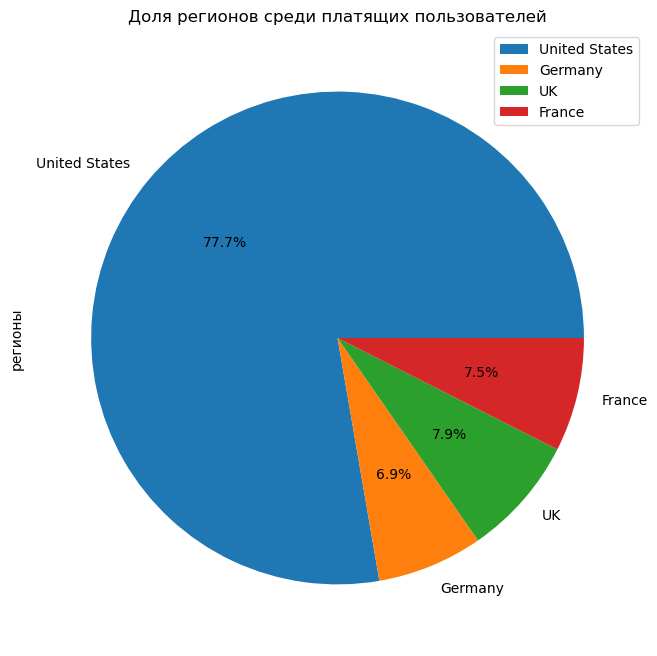

In [61]:
def df_pivot(df,categori):
# Создадим сводную таблицу   
    df = df.pivot_table(index= categori,
                              columns='payer',
                              values='user_id', 
                              aggfunc='nunique')
    df.columns = ['неплатящие_пользователи', 'платящие_пользователи']

# Рассчитаем общее количество заемщиков
    df['всего'] = df['платящие_пользователи'] + df['неплатящие_пользователи']
# Рассчитаем процент от общего количества, 
# округлив число    
    df['%_от_общего_числа'] =((round((df['платящие_пользователи'] / 
                                      df['всего']* 100),2))
                             )
    df = df.sort_values('%_от_общего_числа', ascending=False)
    df.loc['Итого'] = df.sum()
    return df

def df_pie(dt,title,ylabel):
    dt.drop(['Итого'], axis=0).plot(y='платящие_пользователи',
                 kind='pie',
                 figsize = (8,8),
                 autopct='%1.1f%%')
    plt.title(f'Доля {title} среди платящих пользователей')
    plt.ylabel(ylabel)
    plt.show(block=True)
    

# Строим сводную таблицу
region_payers = df_pivot(profiles,'region')
print("\033[1m{}\033[0m".format('               Группировка пользователей по странам'))
display(region_payers)
print()

df_pie(region_payers,'регионов','регионы')

In [62]:
def conclusion(dt):
    a = dt.drop(['Итого'], axis=0)['платящие_пользователи'].max().astype('int')
    b = dt.drop(['Итого'], axis=0)['неплатящие_пользователи'].max().astype('int')
    c = dt['платящие_пользователи'].min().astype('int')
    d = dt['неплатящие_пользователи'].min().astype('int')
    return a,b,c,d

a,b,c,d = conclusion(region_payers)    

display(Markdown(
f"По таблице мы видим, что максимальное число пользователей приходят в приложение из *США*, \
причем как платящих, так и не платящих - {a} и {b} человек соответственно. \n\
Минимимальное количество пользователей приходят из *Германии* - {c} и {d} человек соответственно.\
Так же график наглядко иллюстрирует, что доля среди платящих пользователей в Америке - 78%, то есть на\
представленные страны Европы приходится всего около 20%\
\n\n Из этого можно сделать предположение, что реклама в Европейских странах значительно менее эффективна или \
недостаточна, нежеле  в Соединенных Штатах Америки"))

По таблице мы видим, что максимальное число пользователей приходят в приложение из *США*, причем как платящих, так и не платящих - 6902 и 93100 человек соответственно. 
Минимимальное количество пользователей приходят из *Германии* - 616 и 14365 человек соответственно.Так же график наглядко иллюстрирует, что доля среди платящих пользователей в Америке - 78%, то есть напредставленные страны Европы приходится всего около 20%

 Из этого можно сделать предположение, что реклама в Европейских странах значительно менее эффективна или недостаточна, нежеле  в Соединенных Штатах Америки

### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

             Группировка пользователей по устройствам


неплатящие_пользователи  платящие_пользователи     всего  \
device                                                              
Mac                      28130.0                 1912.0   30042.0   
iPhone                   51097.0                 3382.0   54479.0   
Android                  32982.0                 2050.0   35032.0   
PC                       28918.0                 1537.0   30455.0   
Итого                   141127.0                 8881.0  150008.0   

         %_от_общего_числа  
device                      
Mac                   6.36  
iPhone                6.21  
Android               5.85  
PC                    5.05  
Итого                23.47

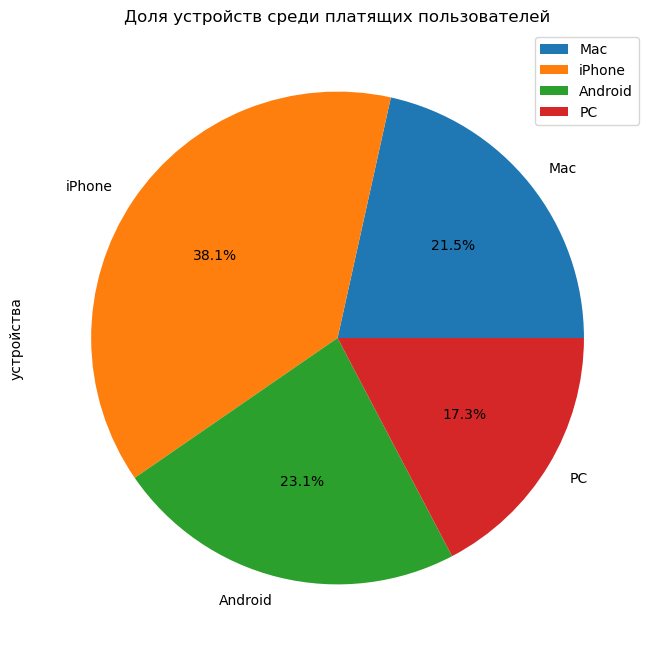

Таблица ***'Группировка пользователей по устройствам'*** иллюстрирует, что максимальное число пользователей предпочитают *iPhone,* - 3382 платящих и 51097 не платящих человек. 
При этом минимимальное количество платящих пользователей предпочитают *PC*(1537 человек), а среди неплатящих - *Mac*(28130 человек).

Частота использования сотовых телефонов в современной жизни зачастую превышает частоту использования компьютеров.Этот факт могут отражать данные таблицы. Однако, следует более подробно изучить причины отставания притока клиентов, пользующихся телефонами с операционной системой Android. Возможно, приложение под Android работаетменее стабильно, с ошибками или с меньшим количеством функций.

In [63]:
device_payers = df_pivot(profiles,'device')
print("\033[1m{}\033[0m".format('             Группировка пользователей по устройствам'))
display(device_payers)
print()

df_pie(device_payers,'устройств','устройства')

a,b,c,d = conclusion(device_payers)

display(Markdown(
f"Таблица ***'Группировка пользователей по устройствам'*** иллюстрирует, что максимальное число пользователей \
предпочитают *iPhone,* - {a} платящих и {b} не платящих человек. \n\
При этом минимимальное количество платящих пользователей предпочитают *PC*({c} человек), \
а среди неплатящих - *Mac*({d} человек).\n\n\
Частота использования сотовых телефонов в современной жизни зачастую превышает частоту использования компьютеров.\
Этот факт могут отражать данные таблицы. Однако, следует более подробно изучить причины отставания притока \
клиентов, пользующихся телефонами с операционной системой Android. Возможно, приложение под Android работает\
менее стабильно, с ошибками или с меньшим количеством функций."))

### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.


             Группировка пользователей по рекламным источникам


неплатящие_пользователи  платящие_пользователи     всего  \
channel                                                                        
FaceBoom                            25587.0                 3557.0   29144.0   
AdNonSense                           3440.0                  440.0    3880.0   
lambdaMediaAds                       1924.0                  225.0    2149.0   
TipTop                              17683.0                 1878.0   19561.0   
RocketSuperAds                       4096.0                  352.0    4448.0   
WahooNetBanner                       8100.0                  453.0    8553.0   
YRabbit                              4147.0                  165.0    4312.0   
MediaTornado                         4208.0                  156.0    4364.0   
LeapBob                              8291.0                  262.0    8553.0   
OppleCreativeMedia                   8372.0                  233.0    8605.0   
organic                             55279.0                 1160.0   56439.0   
Итого                              141127.0                 8881.0  150008.0   

                    %_от_общего_числа  
channel                                
FaceBoom                        12.20  
AdNonSense                      11.34  
lambdaMediaAds                  10.47  
TipTop                           9.60  
RocketSuperAds                   7.91  
WahooNetBanner                   5.30  
YRabbit                          3.83  
MediaTornado                     3.57  
LeapBob                          3.06  
OppleCreativeMedia               2.71  
organic                          2.06  
Итого                           72.05

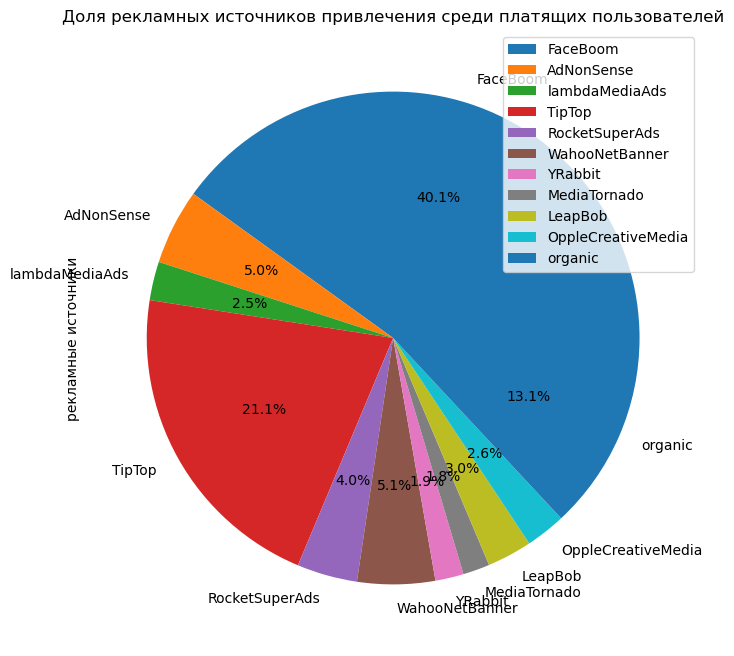

Вышеуказанная таблица показывает, что максимальное число пользователей были привлечены рекламным источником **FaceBoom** (3557 платящих и 55279 не платящих человек). Так же, доля платящих пользователей из всех привлеченных клиентов так же максимальна - 12.2%. 

Следует отметить так же компании  **AdNonSense и lambdaMediaAds**. Общее количество привлеченных клиентов через них невелико (3880  и 2149 человек соответственно), однако платящих клиентов из этого числа -11% и 10.47 % соответственно, что может говорить об их высоком потенциале.

 Компании, привлекающие наименьшее число клиентов и с маленькой долей платящих из них - **YRabbit и MediaTornado** (165 и 156 человек соответственно). Имеет смысл задуматься об отказе сотрудничества с этими рекламными компаниями.

In [64]:
channel_payers = df_pivot(profiles,'channel')
channel_payers
print("\033[1m{}\033[0m".format('             Группировка пользователей по рекламным источникам'))
display(channel_payers)
print()

df_pie(channel_payers,'рекламных источников привлечения','рекламные источники')

a,b,c,d = conclusion(channel_payers)

display(Markdown(
f"Вышеуказанная таблица показывает, что максимальное число пользователей были привлечены рекламным источником \
**FaceBoom** ({a} платящих и {b} не платящих человек). Так же, доля платящих пользователей из всех привлеченных \
клиентов так же максимальна - {channel_payers.loc['FaceBoom']['%_от_общего_числа']}%. \n\n\
Следует отметить так же компании  **AdNonSense и lambdaMediaAds**. Общее количество привлеченных клиентов через них\
 невелико ({channel_payers.loc['AdNonSense']['всего'].astype('int')} \
 и {channel_payers.loc['lambdaMediaAds']['всего'].astype('int')} \
человек соответственно), однако платящих клиентов из этого числа -\
{channel_payers.loc['AdNonSense']['%_от_общего_числа'].astype('int')}% и \
{channel_payers.loc['lambdaMediaAds']['%_от_общего_числа']} % соответственно, что может говорить об их высоком \
потенциале.\n\n Компании, привлекающие наименьшее число клиентов и с маленькой долей платящих из них - \
**YRabbit и MediaTornado** (165 и 156 человек соответственно). \
Имеет смысл задуматься об отказе сотрудничества с этими рекламными компаниями."))

В этом разделе нам были предоставлены данные за срок с 2019-05-01 по 2019-10-27.

Анализ показал, что доля среди платящих пользователей в **Америке - 78%**, а на представленные страны Европы приходится всего около 20%. Из этого можно сделать предположение, что реклама в Европейских странах значительно менее эффективна или недостаточна, нежеле в Соединенных Штатах Америки. 

Максимальное число пользователей предпочитают **iPhone**. Возможно это говорит о сложившейся тенденции больше использовать сотовые телефоны недели компьютеры. Однако, следует более подробно изучить причины отставания притока клиентов, пользующихся телефонами с операционной системой **Android.** Возможно, приложение под **Android** работает менее стабильно, с ошибками или с меньшим количеством функций.

При анализе количества привлеченных клиентов тем или иным источником было сделано следующее заключение: максимальное число пользователей привлечены **FaceBoom**, а доля платящих пользователей привлеченных этим источников  от общего числа - 12.2%.

Следует отметить так же компании **AdNonSense и lambdaMediaAds**. Общее количество привлеченных клиентов через них не велико, однако платящих клиентов из этого числа -11% и 10.47 % соответственно, что может говорить об их высоком потенциале.

## Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

### Расчет общей суммы расходов на маркетинг.

In [65]:
def c_pivot(dt,x=[]):
    dt = (dt.pivot_table(index= ['channel'],
                        columns=x,
                        values='costs', 
                        aggfunc='sum'))
    dt['%'] = round(dt['costs']/dt['costs'].sum()*100,2)
#    dt.sort_values('costs', ascending=False)
    dt.loc['Итого'] = dt.sum()
    return dt

costs_pivot = c_pivot(costs)

display(Markdown(
f"Общая сумма расходов на рекламу составляет {round(costs_pivot.loc['Итого']['costs'],2)}."))

Общая сумма расходов на рекламу составляет 105497.3.

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Общие затраты посчитали.
</div>

### Определение распределения трат по рекламным источникам.

**Распределение расходов на рекламу**


costs       %
channel                              
TipTop               54751.30   51.90
FaceBoom             32445.60   30.75
WahooNetBanner        5151.00    4.88
AdNonSense            3911.25    3.71
OppleCreativeMedia    2151.25    2.04
RocketSuperAds        1833.00    1.74
LeapBob               1797.60    1.70
lambdaMediaAds        1557.60    1.48
MediaTornado           954.48    0.90
YRabbit                944.22    0.90
Итого               105497.30  100.00

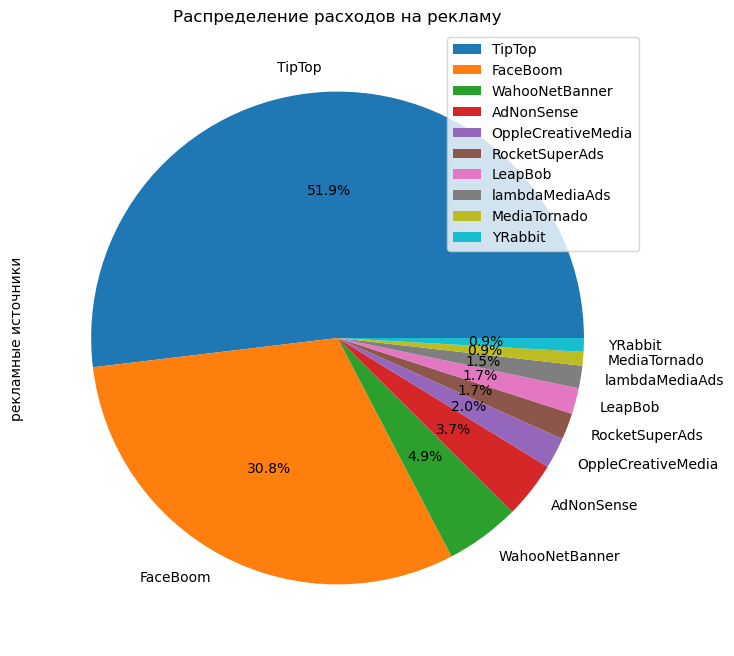

По графику и таблице мы видим, что больше всего расходов приходится на рекламу от **TipTop** (51.9%). Наиболее эффективный источник привлечения клиентов-**FaceBoom**  находится на втором месте по затратам на эту рекламу - 30.75% от общего числа.

 Затраты на **AdNonSense и lambdaMediaAds**, отмеченных в предыдущем разделе, как перспективные  источники привлечения клиентов, весьма невелики: 3.71% и 1.48% соответственно.

In [66]:
costs_pivot = costs_pivot.drop(['Итого'], axis=0).sort_values('%', ascending=False)
costs_pivot.loc['Итого'] = costs_pivot.sum()
display(Markdown(f"**Распределение расходов на рекламу**\n"),costs_pivot)
print()
costs_pivot.drop(['Итого'], axis=0).plot(y='costs',
                 kind='pie',
                 figsize = (8,8),
                 autopct='%1.1f%%')
plt.title('Распределение расходов на рекламу')
plt.ylabel('рекламные источники')
plt.show(block=True)



display(Markdown(f"По графику и таблице мы видим, что больше всего расходов приходится на рекламу от **TipTop**\
 ({costs_pivot.drop(['Итого'])['%'].max()}%). Наиболее эффективный источник привлечения клиентов-**FaceBoom** \
 находится на втором месте по затратам на эту рекламу - {costs_pivot.loc['FaceBoom']['%']}% от общего числа.\n\n\
 Затраты на **AdNonSense и lambdaMediaAds**, отмеченных в предыдущем разделе, как перспективные \
 источники привлечения клиентов, весьма невелики: {costs_pivot.loc['AdNonSense']['%']}% и\
 {costs_pivot.loc['lambdaMediaAds']['%']}% соответственно."))

### График с визуализацией динамики изменения расходов во времени по неделям по каждому источнику и график с визуализацией динамики изменения расходов во времени по месяцам по каждому источнику.

**Динамика распределения расходов на рекламу по месяцам**


2019-05-01  2019-06-01  2019-07-01  2019-08-01  \
channel                                                              
TipTop                 2981.00    6675.600     8410.20    11202.00   
FaceBoom               3524.40    5501.100     5294.30     6274.40   
WahooNetBanner          418.80     921.000      851.40     1040.40   
AdNonSense             1169.70     538.650      504.00      579.60   
OppleCreativeMedia      169.75     370.000      366.50      439.25   
RocketSuperAds          577.98     325.715      252.07      253.11   
LeapBob                 140.28     314.580      313.53      369.81   
lambdaMediaAds          458.40     199.200      219.20      220.00   
MediaTornado            238.56     138.000      138.48      154.56   
YRabbit                 299.70     106.200       97.38      124.74   
Итого                  9978.57   15090.045    16447.06    20657.87   

                    2019-09-01  2019-10-01      всего  
channel                                                
TipTop                13232.50   12250.000   54751.30  
FaceBoom               6114.90    5736.500   32445.60  
WahooNetBanner          977.40     942.000    5151.00  
AdNonSense              581.70     537.600    3911.25  
OppleCreativeMedia      427.75     378.000    2151.25  
RocketSuperAds          218.40     205.725    1833.00  
LeapBob                 343.98     315.420    1797.60  
lambdaMediaAds          247.20     213.600    1557.60  
MediaTornado            144.72     140.160     954.48  
YRabbit                 152.79     163.410     944.22  
Итого                 22441.34   20882.415  105497.30

 Мы видим, что существуют значительные различия в динамике расходов между разными рекламнымиканалами. Например, TipTop демонстрирует постоянное увеличение расходов, в это время другие каналы показывают более стабильную динамику. Так же именно эту компанию можно назвать лидером по расходам (54751.3)

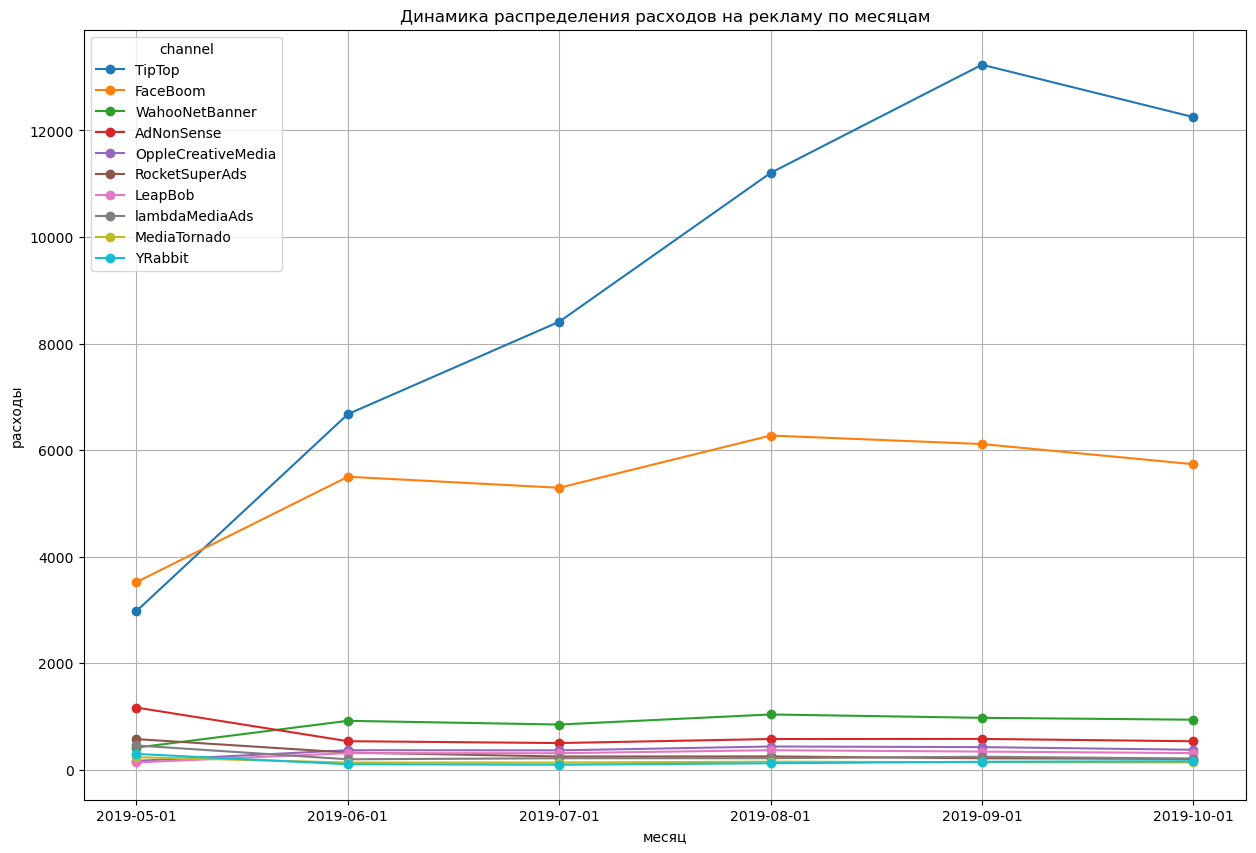

In [67]:
costs['month'] = pd.to_datetime(costs['dt']).dt.to_period('M').dt.to_timestamp()
costs['week'] = pd.to_datetime(costs['dt']).dt.to_period('W').dt.to_timestamp()

def pivot1(df,columns):
    df = (df.pivot_table(index= ['channel'],
                        columns=columns,
                        values=['costs'], 
                        aggfunc='sum'))
    return df

def plot1(df,name,name2):
     # Строим линейный график с маркерами
    df.T.plot(kind='line', marker='o', figsize=(15,10))
    # Добавляем название графика и подписи осей
    plt.title('Динамика распределения расходов на рекламу по ' + name)
    plt.xlabel(name2)
    plt.ylabel('расходы')
    plt.grid(True)
    plt.show
    
    
costs_pivot2 = pivot1(costs,'month')

costs_pivot2.columns = ['2019-05-01','2019-06-01','2019-07-01','2019-08-01','2019-09-01','2019-10-01']
costs_pivot2['всего'] = (costs_pivot2['2019-05-01']
                         +costs_pivot2['2019-06-01']
                         +costs_pivot2['2019-07-01']
                         +costs_pivot2['2019-08-01']
                         +costs_pivot2['2019-09-01']
                         +costs_pivot2['2019-10-01'])
costs_pivot2 = costs_pivot2.sort_values('всего', ascending=False)
costs_pivot2.loc['Итого'] = costs_pivot2.sum()


display(Markdown(f"**Динамика распределения расходов на рекламу по месяцам**\n")
        ,costs_pivot2)

plot1(costs_pivot2.drop(['Итого'], axis=0).drop(['всего'], axis=1),'месяцам','месяц')

display(Markdown(f" Мы видим, что существуют значительные различия в динамике расходов между разными рекламными\
каналами. Например, TipTop демонстрирует постоянное увеличение расходов, в это время другие каналы показывают \
более стабильную динамику. Так же именно эту компанию можно назвать лидером по расходам \
({costs_pivot2.loc['TipTop']['всего']})"))

week                2019-04-29  2019-05-06  2019-05-13  2019-05-20  \
channel                                                              
AdNonSense              211.05      273.00      265.65      266.70   
FaceBoom                535.70      750.20      755.70      722.70   
LeapBob                  16.80       31.71       26.67       26.67   
MediaTornado             38.64       61.68       59.04       50.16   
OppleCreativeMedia       24.00       34.50       27.50       34.25   
RocketSuperAds           99.45      139.23      138.06      131.04   
TipTop                  347.00      470.00      454.00      801.80   
WahooNetBanner           49.20       92.40       90.00       79.20   
YRabbit                  52.20       75.90       69.30       65.40   
lambdaMediaAds           81.60      103.20       90.40      119.20   

week                2019-05-27  2019-06-03  2019-06-10  2019-06-17  \
channel                                                              
AdNonSense             202.650      102.90       96.60      141.75   
FaceBoom              1208.900     1081.30     1042.80     1280.40   
LeapBob                 65.520       66.99       52.29       68.46   
MediaTornado            36.960       27.60       29.76       32.16   
OppleCreativeMedia      81.750       79.50       71.50       79.75   
RocketSuperAds          97.695       76.05       63.18       80.73   
TipTop                1421.200     1223.60     1121.00     1474.40   
WahooNetBanner         179.400      196.80      166.20      201.60   
YRabbit                 49.800       25.80       17.46       22.14   
lambdaMediaAds          83.200       35.20       45.60       40.00   

week                2019-06-24  2019-07-01  ...  2019-08-19  2019-08-26  \
channel                                     ...                           
AdNonSense              148.05     130.200  ...      142.80      133.35   
FaceBoom               1647.80    1536.700  ...     1411.30     1445.40   
LeapBob                  99.75      87.360  ...       90.51       77.91   
MediaTornado             40.56      43.440  ...       35.28       33.84   
OppleCreativeMedia      107.00     102.500  ...      103.75       92.75   
RocketSuperAds           78.26      75.075  ...       40.30       51.35   
TipTop                 2343.60    2340.000  ...     2514.00     2583.00   
WahooNetBanner          285.00     256.800  ...      244.80      235.80   
YRabbit                  27.90      28.260  ...       30.03       24.36   
lambdaMediaAds           59.20      60.000  ...       57.60       54.40   

week                2019-09-02  2019-09-09  2019-09-16  2019-09-23  \
channel                                                              
AdNonSense             100.800      100.80     139.650      192.15   
FaceBoom              1151.700     1148.40    1496.000     1837.00   
LeapBob                 66.990       63.84      81.270      101.22   
MediaTornado            30.240       25.92      30.240       48.24   
OppleCreativeMedia      72.750       78.00     105.750      132.25   
RocketSuperAds          40.625       40.95      56.225       63.70   
TipTop                2563.000     2506.00    3241.000     3979.50   
WahooNetBanner         174.600      192.60     226.200      303.00   
YRabbit                 27.930       29.76      39.600       47.52   
lambdaMediaAds          52.000       41.60      57.600       80.00   

week                2019-09-30  2019-10-07  2019-10-14  2019-10-21  
channel                                                             
AdNonSense              155.40     136.500     118.650      154.35  
FaceBoom               1761.10    1392.600    1291.400     1552.10  
LeapBob                 101.01      78.960      69.720       84.42  
MediaTornado             42.00      36.960      29.040       37.44  
OppleCreativeMedia      123.00      88.250      88.000      101.50  
RocketSuperAds           66.30      51.675      46.475       50.70  
TipTop                 3

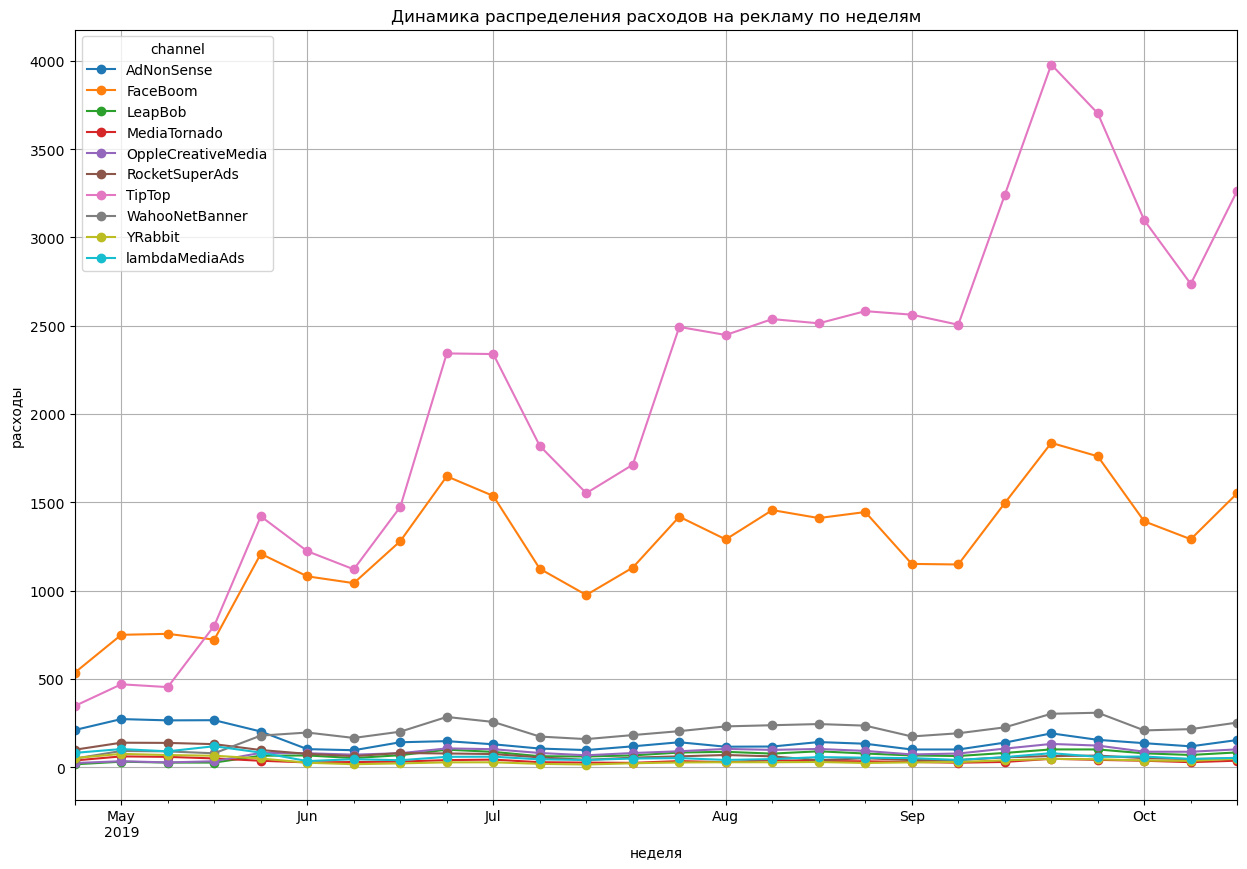

In [68]:
costs_pivot3 = pivot1(costs,'week')
costs_pivot3.columns = costs_pivot3.columns.droplevel(0)
display(costs_pivot3)

plot1(costs_pivot3,'неделям','неделя')

In [69]:
display(Markdown(f" Аналогично вышеописанному графику у **TipTop** лидирующая по расходам позиция с двумя\
большими пиками в конце июня и конце сентября. При этом, график показывает, что на начало исследуемого периода \
расходы на рекламу этого источника были ниже, чем у **FaceBoom.** Но уже в середине мая ситуация изменилась.\
Так же следует отметить, что к концу исследуемого периода расходы на ремламу от многих компаний стали падать."))

 Аналогично вышеописанному графику у **TipTop** лидирующая по расходам позиция с двумябольшими пиками в конце июня и конце сентября. При этом, график показывает, что на начало исследуемого периода расходы на рекламу этого источника были ниже, чем у **FaceBoom.** Но уже в середине мая ситуация изменилась.Так же следует отметить, что к концу исследуемого периода расходы на ремламу от многих компаний стали падать.

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Видим динамику расходов. TipTop и FaceBoom заметно выделяются.
</div>

### Средняя стоимость привлечения одного пользователя (CAC) из каждого источника рекламы.

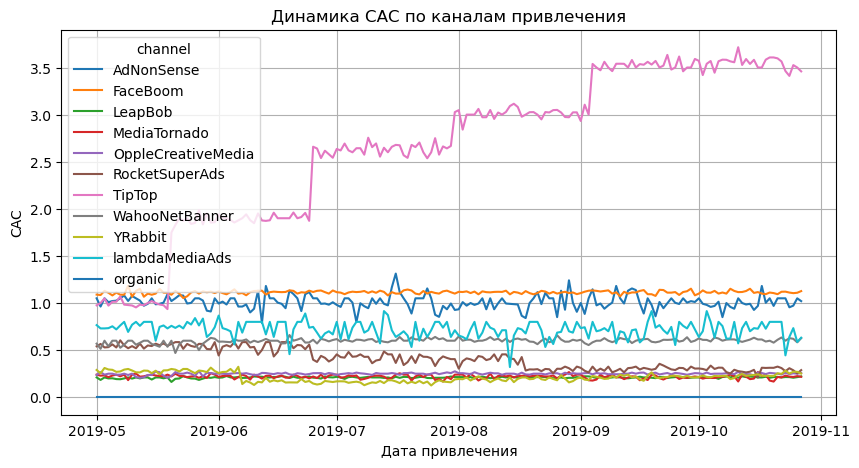

**Средняя стоимость привлечения одного пользователя (CAC) из каждого источника рекламы**


channel
TipTop                2.66
FaceBoom              1.11
AdNonSense            1.01
lambdaMediaAds        0.72
WahooNetBanner        0.60
RocketSuperAds        0.41
OppleCreativeMedia    0.25
MediaTornado          0.22
YRabbit               0.21
LeapBob               0.21
organic               0.00
Средняя_САС           0.67
Name: всего, dtype: float64

**Средняя стоимость привлечения одного пользователя (CAC) для проекта**


np.float64(0.703)

График динамики средней стоимости привлечения одного пользователя показывает, что все каналы  привлечения имеют стабильную величину затрат, кроме одного - TipTop. График показывает, что в течение всего исследуемого периода затраты на привлечение одного пользователя только растут и достигают 3,5 на конец исследуемогопериода. В среднем, за весь исследуемый период затраты у TipTop -2.66 (на 0.7 выше CAC проекта)

In [70]:
# строим график истории изменений CAC по каналам привлечения

cac_pivot_table = profiles.pivot_table(index='dt', 
                     columns='channel', 
                     values='acquisition_cost',
                     aggfunc='mean')

cac_pivot_table.plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

cac_pivot_table = cac_pivot_table.T
cac_pivot_table['всего'] = cac_pivot_table.mean(axis=1)
cac_pivot_table = cac_pivot_table.sort_values('всего',ascending=False)
x=round(cac_pivot_table['всего'].max(),2)
cac_pivot_table.loc['Средняя_САС'] = cac_pivot_table.mean()

display(Markdown(f"**Средняя стоимость привлечения одного пользователя (CAC) из каждого источника рекламы**\n")
        , round(cac_pivot_table['всего'],2))
display(Markdown(f"**Средняя стоимость привлечения одного пользователя (CAC) для проекта**\n")
        , round(profiles['acquisition_cost'].mean(),3))

display(Markdown(f"График динамики средней стоимости привлечения одного пользователя показывает, что все каналы  \
привлечения имеют стабильную величину затрат, кроме одного - TipTop. График показывает, что в течение всего \
исследуемого периода затраты на привлечение одного пользователя только растут и достигают 3,5 на конец исследуемого\
периода. В среднем, за весь исследуемый период затраты у TipTop -{x}\
 (на {round(profiles['acquisition_cost'].mean(),2)} выше CAC проекта)"))

Общая сумма расходов на рекламу составляет 105497.3.
По графику и таблице мы видим, что больше всего расходов приходится на рекламу от **TipTop (51.9%).** Наиболее эффективный источник привлечения клиентов-**FaceBoom** находится на втором месте по затратам на эту рекламу - 30.75% от общего числа.

Затраты на **AdNonSense и lambdaMediaAds**, отмеченных в предыдущем разделе, как перспективные источники привлечения клиентов, весьма невелики: 3.71% и 1.48% соответственно.
При анализе динамики затрат было определено, что у **TipTop** лидирующая по расходам позиция с двумя большими пиками в конце июня и конце сентября, возможно в это время проводились рекламные компании. При этом, можно отметить, что на начало исследуемого периода расходы на рекламу этого источника были ниже, чем у **FaceBoom,** но уже в середине мая ситуация изменилась. Компания **TipTop** могла изменить расценки по стоимости привлечения клиентов.

К концу исследуемого периода расходы на ремламу от многих компаний стали падать.
Средняя стоимость одного пользователя показала, что затраты на услуги **TipTop** превышают вторую по величине затрат позицию в 2,4 раза.

## Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

### Анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI

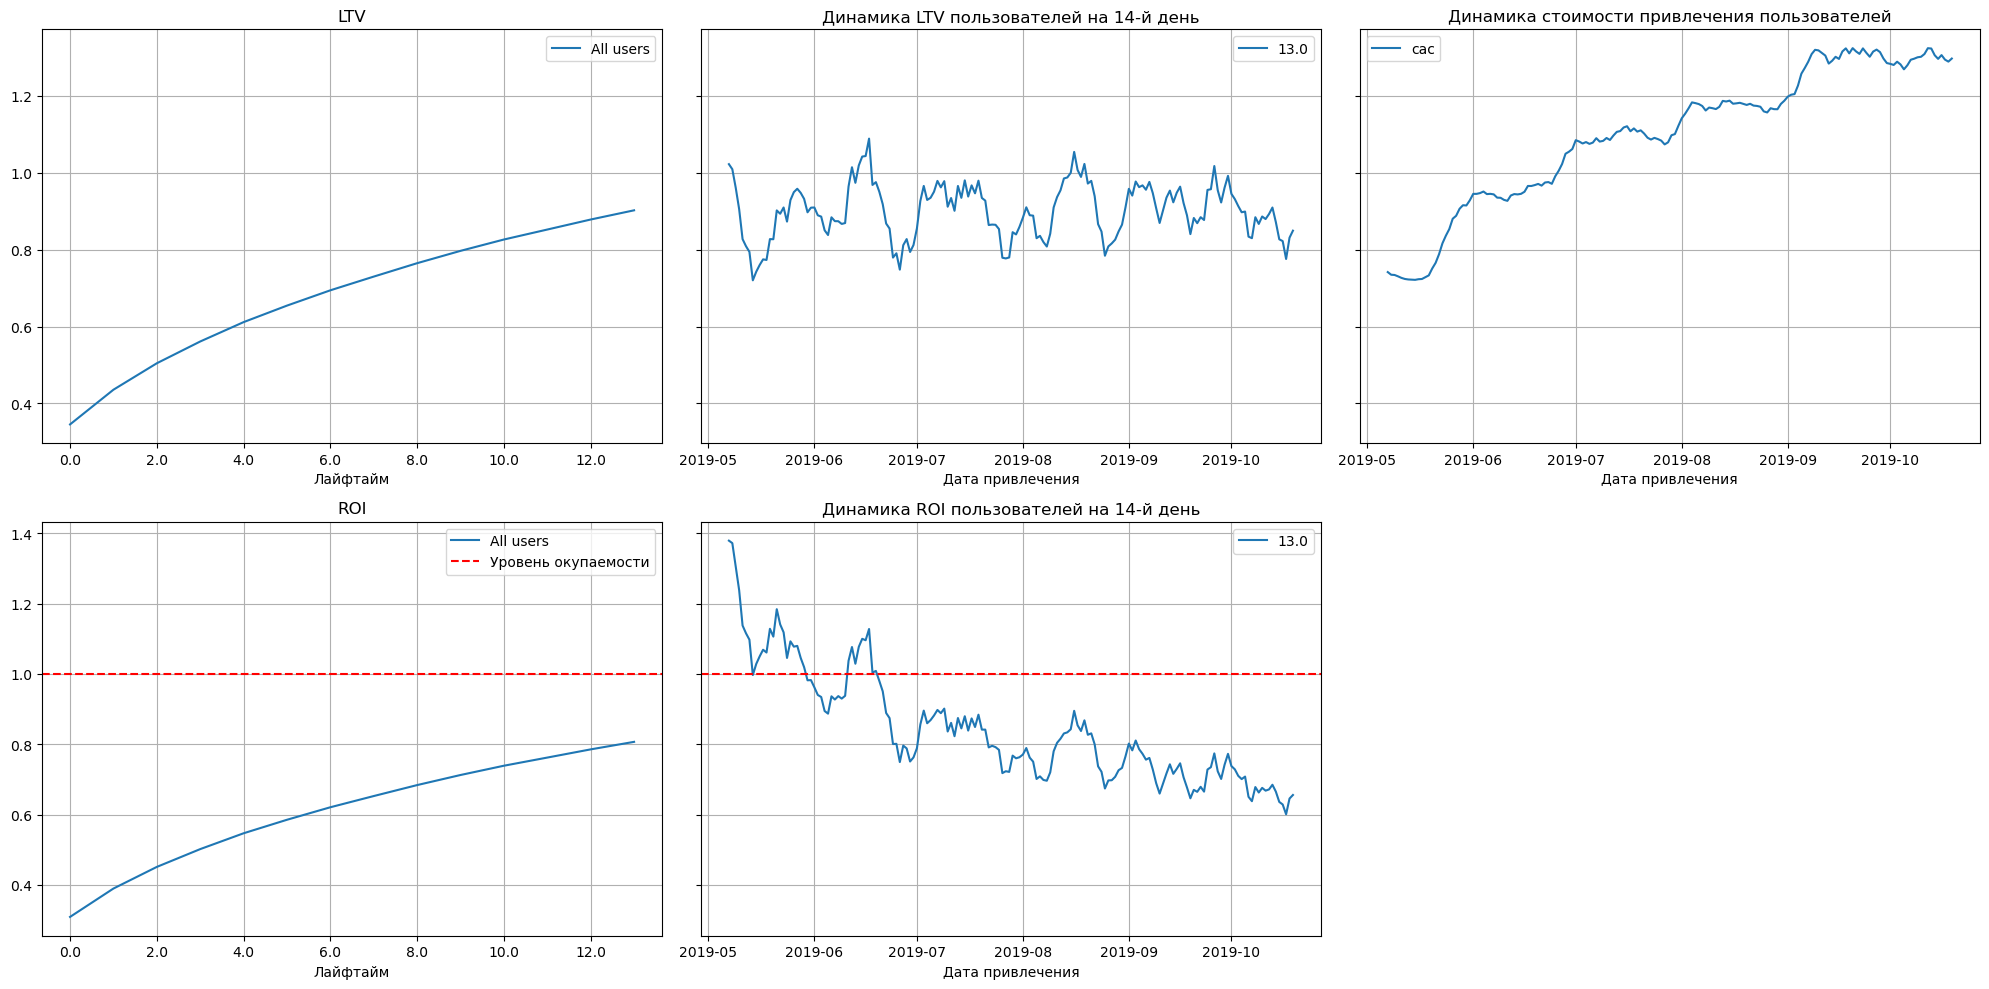

In [71]:
# Создадим таблицу без пользователей с органическим трафиком для дальнейшего анализа
profiles_no_org = profiles.query('channel != "organic"')

observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14

(ltv_raw,
 ltv_grouped,
 ltv_history,
 roi_grouped,
 roi_history) = get_ltv(profiles_no_org,
                      orders,
                      observation_date,
                      horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)


График показывает, что реклама за исследуемый период не окупилась, но стримится к этому. ROI на конец второй недели исследуемого периода достиг 80%.
Стоимость привлечения пользователей увеличивается и как мы увидели при анализе выше- большой вклад в это увеличение привлечение рекламного источника TipTop.

Хоть ROI и стремиться к достижению окупаемости, мы видим, что график динамики пользователей ROI на 14 день показывает спад и становится ниже уровня окупаемости.


### Проверка конверсии пользователей и динамики её изменения. Проверка  удержания пользователей.

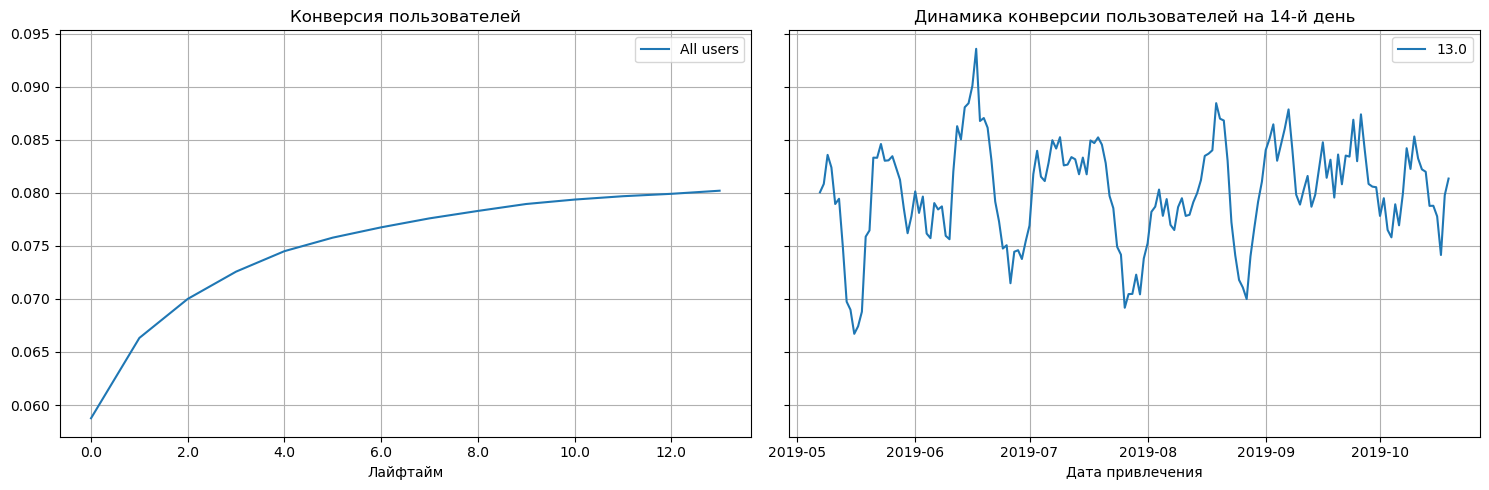

In [72]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no_org, orders, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days)


Уровень конверсии достаточно высокий, выше 80% на конец исследуемого периода. График динамики конверсии так же говорит, о том, что ее уровень растет и к концу исследуемого периода выше 80% на 14-ый день, однако, наблюдается волатильность с резкими пиками и спадами, что может свидетельствовать о непостоянстве эффективности рекламных кампаний или о различиях в поведении пользователей. Спады могут указывать на периоды, когда расходы на привлечение клиента не окупаются.

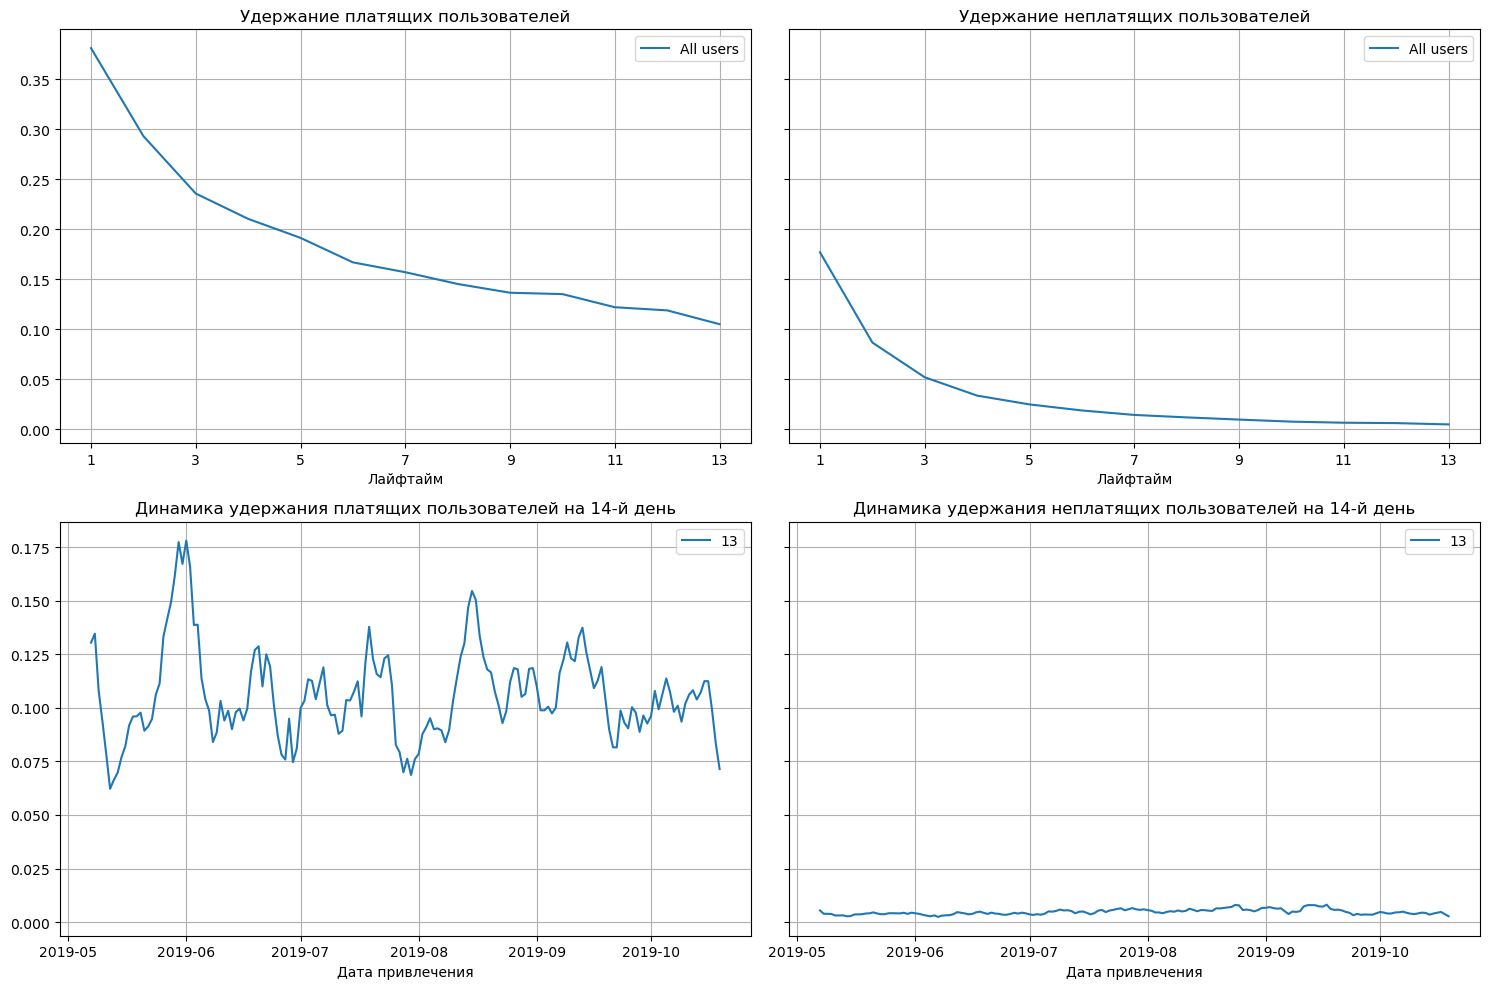

In [73]:
# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_org, visits, observation_date, horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days)

График удержания пользователей показывает падение уровня пользователей как платящих, так и не платящих.
Удержание снижается со временем, что является нормальным для большинства приложений, но скорость снижения удержания может вызывать беспокойство. Это может указывать на проблемы с удовлетворенностью пользователей, ценностью продукта или послепродажным обслуживанием.

По графику Динамики удержания платящих пользователей заметна волатильность с пиками и спадами. Это может указывать на сезонные колебания или на влияние определенных маркетинговых акций и обновлений продукта.

Компанию должно волновать искоренение проблем с удержание в первую очередь платящих пользователей, поскольку они напрямую влияют на доходы. 
Низкое удержание может быть признаком необходимости улучшения функционала приложения, повышения качества контента или оптимизации пользовательского опыта. 
Стоит проанализировать качество трафика из различных рекламных каналов, чтобы определить, какие из них приводят более лояльных пользователей.

####  Анализ конверсии пользователей и динамики её изменения. Проверка удержания пользователей с разбивкой по устройствам.

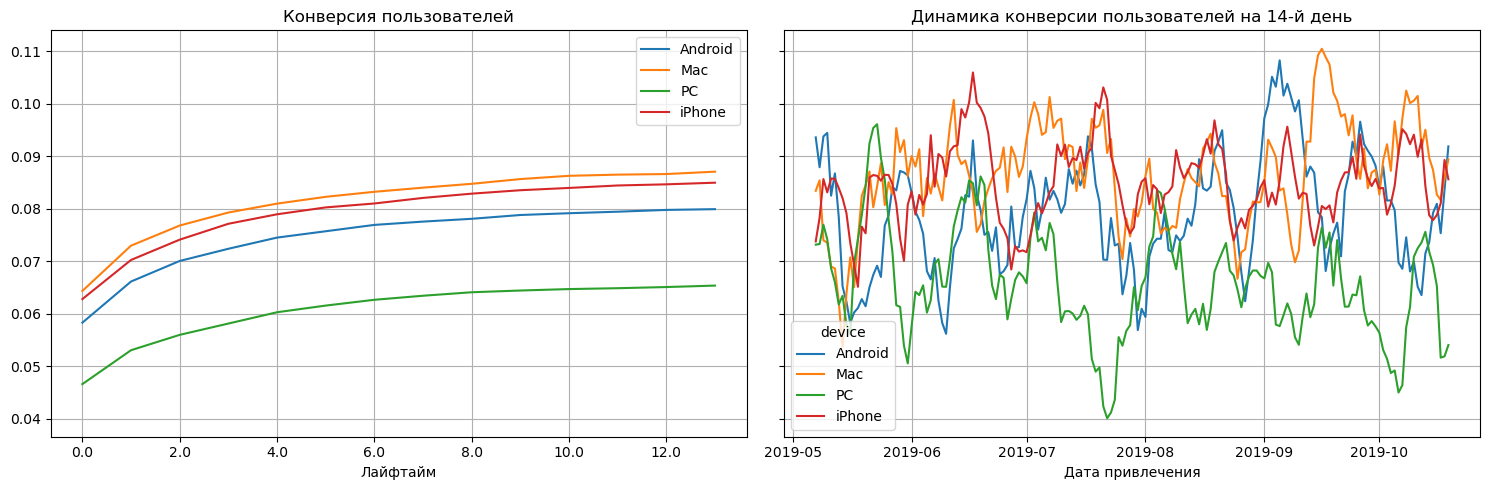

**Конверсия пользователей  на 14-й день**


device
Mac        0.087057
iPhone     0.084959
Android    0.079921
PC         0.065368
Name: 13.0, dtype: float64

Наиболее высокий уровень конверсии у пользователей **Mac**, наименьший у пользователей **PC.**

In [74]:
# смотрим конверсию с разбивкой по странам

dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no_org, orders, observation_date, horizon_days, dimensions= dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

display(Markdown(f"**Конверсия пользователей  на 14-й день**\n"),
        conversion_grouped[13].sort_values(ascending=False))

display(Markdown(f"Наиболее высокий уровень конверсии у пользователей **Mac**, наименьший у пользователей **PC.**"))

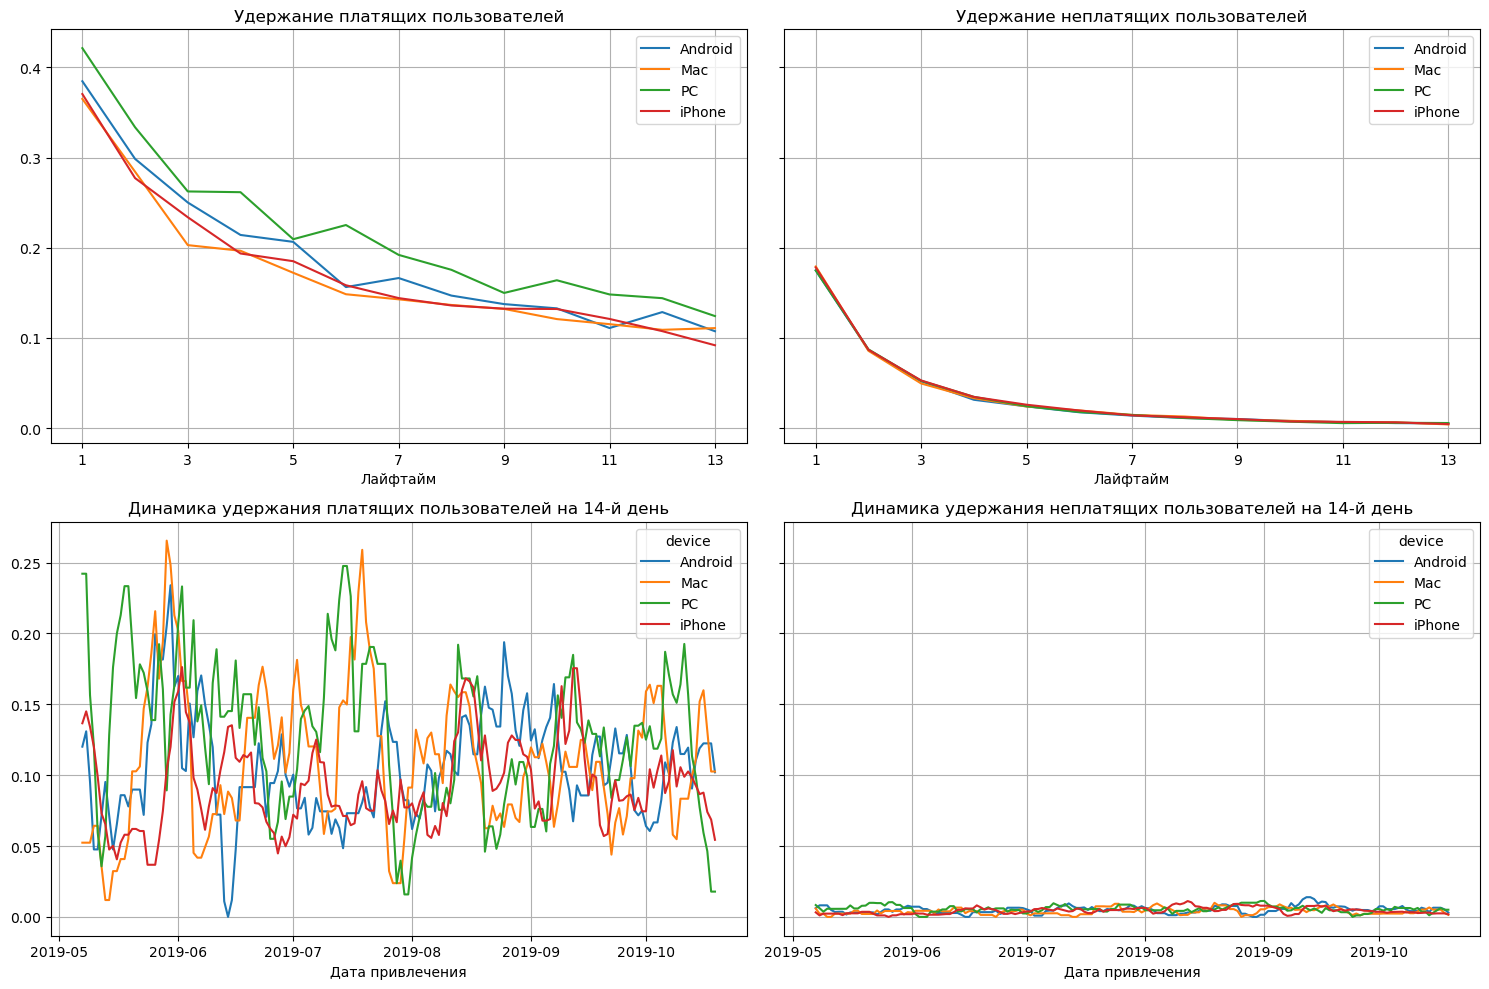

По графикам удержания с разбивкой по устройствам нельзя сказать,что пользователи того или иного устройства сильно отличаются 

In [75]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_org, visits, observation_date, horizon_days, dimensions= dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

display(Markdown(f"По графикам удержания с разбивкой по устройствам нельзя сказать,\
что пользователи того или иного устройства сильно отличаются "))

<div class="alert alert-success">
  
  <b>Комментарий ревьюера v.2</b>
    
  ✔️ По устройствам все достаточно ровно.
</div>

####  Анализ конверсии пользователей и динамики её изменения. Проверка удержания пользователей с разбивкой по странам.

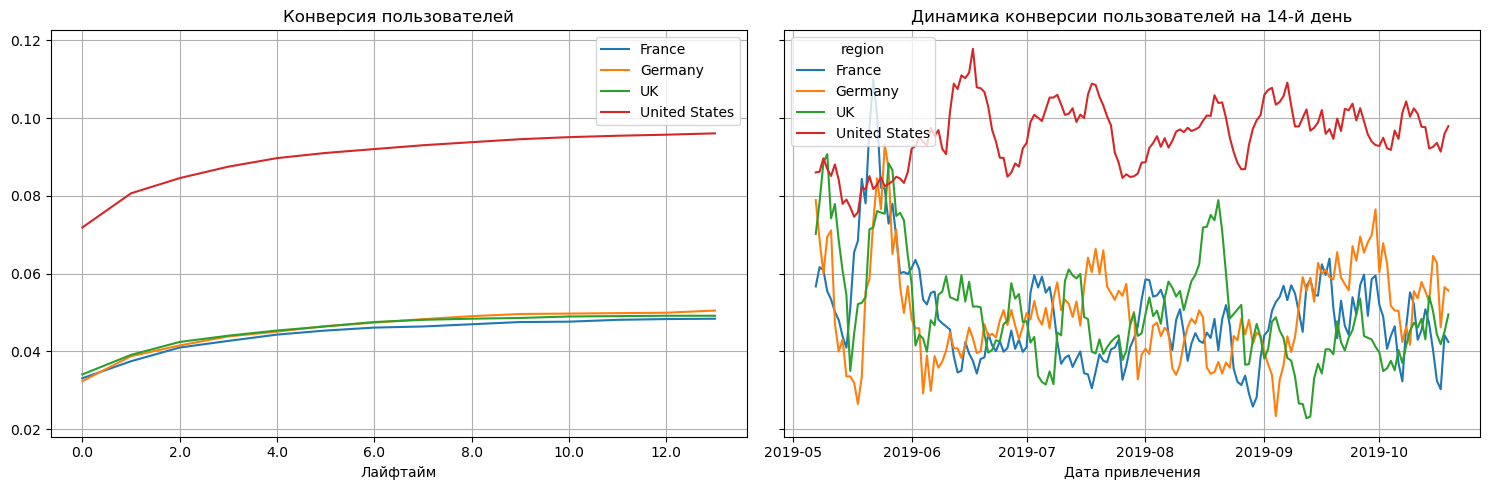

**Конверсия пользователей  на 14-й день**


region
United States    0.096069
Germany          0.050498
UK               0.049165
France           0.048402
Name: 13.0, dtype: float64

Наиболее высокий уровень конверсии у пользователей из **США**, при этом пользователи из **Европы** значительно отстают по уровню конверсии от пользователей из **США**.

In [76]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no_org, orders, observation_date, horizon_days, dimensions= dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

display(Markdown(f"**Конверсия пользователей  на 14-й день**\n"),
        conversion_grouped[13].sort_values(ascending=False))
display(Markdown(f"Наиболее высокий уровень конверсии у пользователей из **США**, \
при этом пользователи из **Европы** значительно отстают по уровню конверсии от пользователей из **США**."))

<div class="alert alert-success">
  
  <b>Комментарий ревьюера v.2</b>
    
  ✔️ В США конверсия заметно выше.
</div>

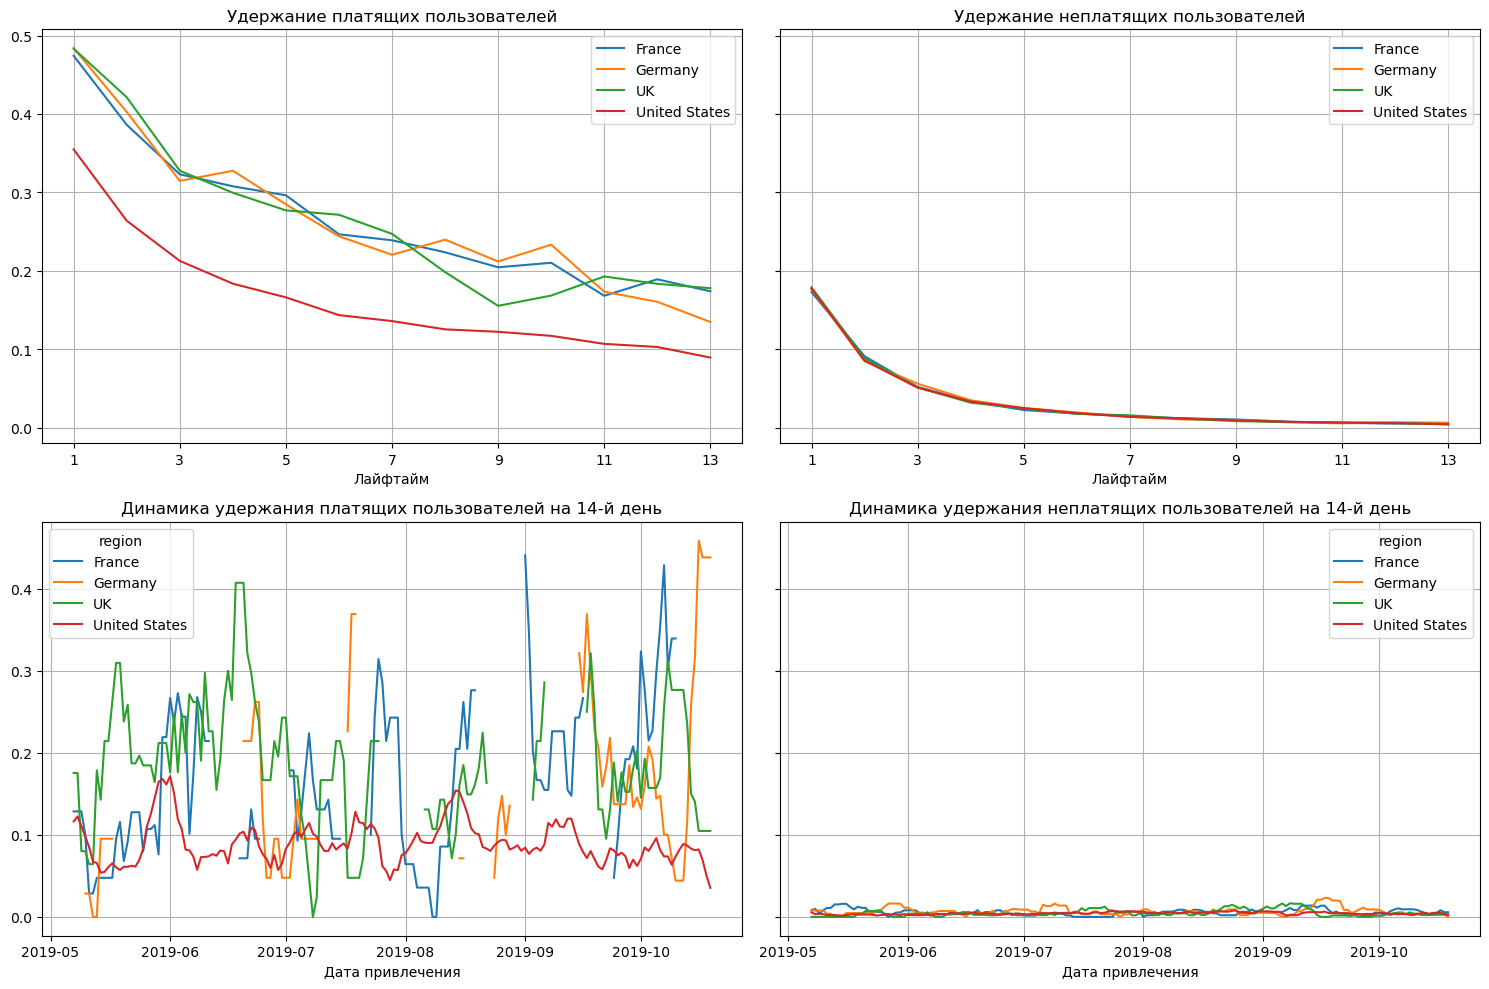

Удержание платящих пользователей из **США** в отличае от конверсии занимает отстающую позицию. У неплатящих пользователей показатели удержания практически не отличимы в разных странах.

С учетом высокого уровняконверсии именно у пользователей из США, следует подробнее изучить причины отставания этих пользователей по уровнюудержания от пользователей из других стран. 

 Возможно,  пользователи в США менее заинтересованы в продолжении использования продукта или менее удовлетворены им. Может быть, после первоначальной покупки пользователи сталкиваются с проблемами, которые приводят к оттоку. Низкое удержание может также свидетельствовать о том,что продукт или услуга не полностью соответствует ожиданиям американских пользователей. Успешная реклама,привлекшая большое количество польльзователей, могла преукрасить функционал приложения.

In [77]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_org, visits, observation_date, horizon_days, dimensions= dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)
display(Markdown(f"Удержание платящих пользователей из **США** в отличае от конверсии занимает отстающую позицию. \
У неплатящих пользователей показатели удержания практически не отличимы в разных странах.\n\n\
С учетом высокого уровня\
конверсии именно у пользователей из США, следует подробнее изучить причины отставания этих пользователей по уровню\
удержания от пользователей из других стран. \n\n Возможно,  пользователи в США менее заинтересованы в продолжении \
использования продукта или менее удовлетворены им. Может быть, после первоначальной покупки пользователи \
сталкиваются с проблемами, которые приводят к оттоку. Низкое удержание может также свидетельствовать о том,\
что продукт или услуга не полностью соответствует ожиданиям американских пользователей. Успешная реклама,\
привлекшая большое количество польльзователей, могла преукрасить функционал приложения."))


<div class="alert alert-success">
  
  <b>Комментарий ревьюера v.2</b>
    
  ✔️ Еще одну проблему в США обнаружили.
</div>

####  Анализ конверсии пользователей и динамики её изменения. Проверка удержания пользователей с разбивкой по рекламным каналам.

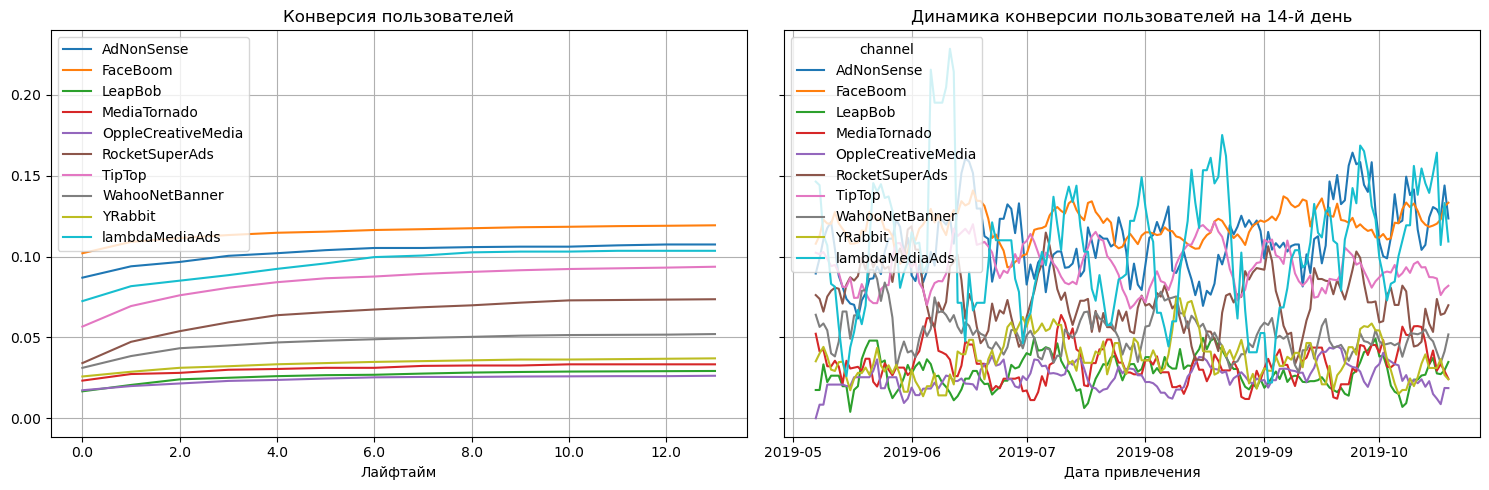

**Конверсия пользователей  на 14-й день**


channel
FaceBoom              0.119373
AdNonSense            0.107509
lambdaMediaAds        0.103599
TipTop                0.093740
RocketSuperAds        0.073630
WahooNetBanner        0.052091
YRabbit               0.037055
MediaTornado          0.033357
LeapBob               0.029248
OppleCreativeMedia    0.026293
Name: 13.0, dtype: float64

Каналы с самой высокой конверсией, такие как FaceBoom и AdNonSense, кажутся наиболее эффективными. По таблице конверсии пользователей  на 14-й день точные значения так же подтверждают лидерство FaceBoom и AdNonSense (эти каналы показывают самые высокие показатели). 

In [78]:
# смотрим конверсию с разбивкой по странам

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no_org, orders, observation_date, horizon_days, dimensions= dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

display(Markdown(f"**Конверсия пользователей  на 14-й день**\n"),
        conversion_grouped[13].sort_values(ascending=False))

display(Markdown(f"Каналы с самой высокой конверсией, такие как FaceBoom и AdNonSense, кажутся наиболее \
эффективными. По таблице конверсии пользователей  на 14-й день точные значения так же подтверждают лидерство \
FaceBoom и AdNonSense (эти каналы показывают самые высокие показатели). "))

<div class="alert alert-success">
  
  <b>Комментарий ревьюера v.2</b>
    
  ✔️ Конверсия у дорогих каналов высокая.
</div>

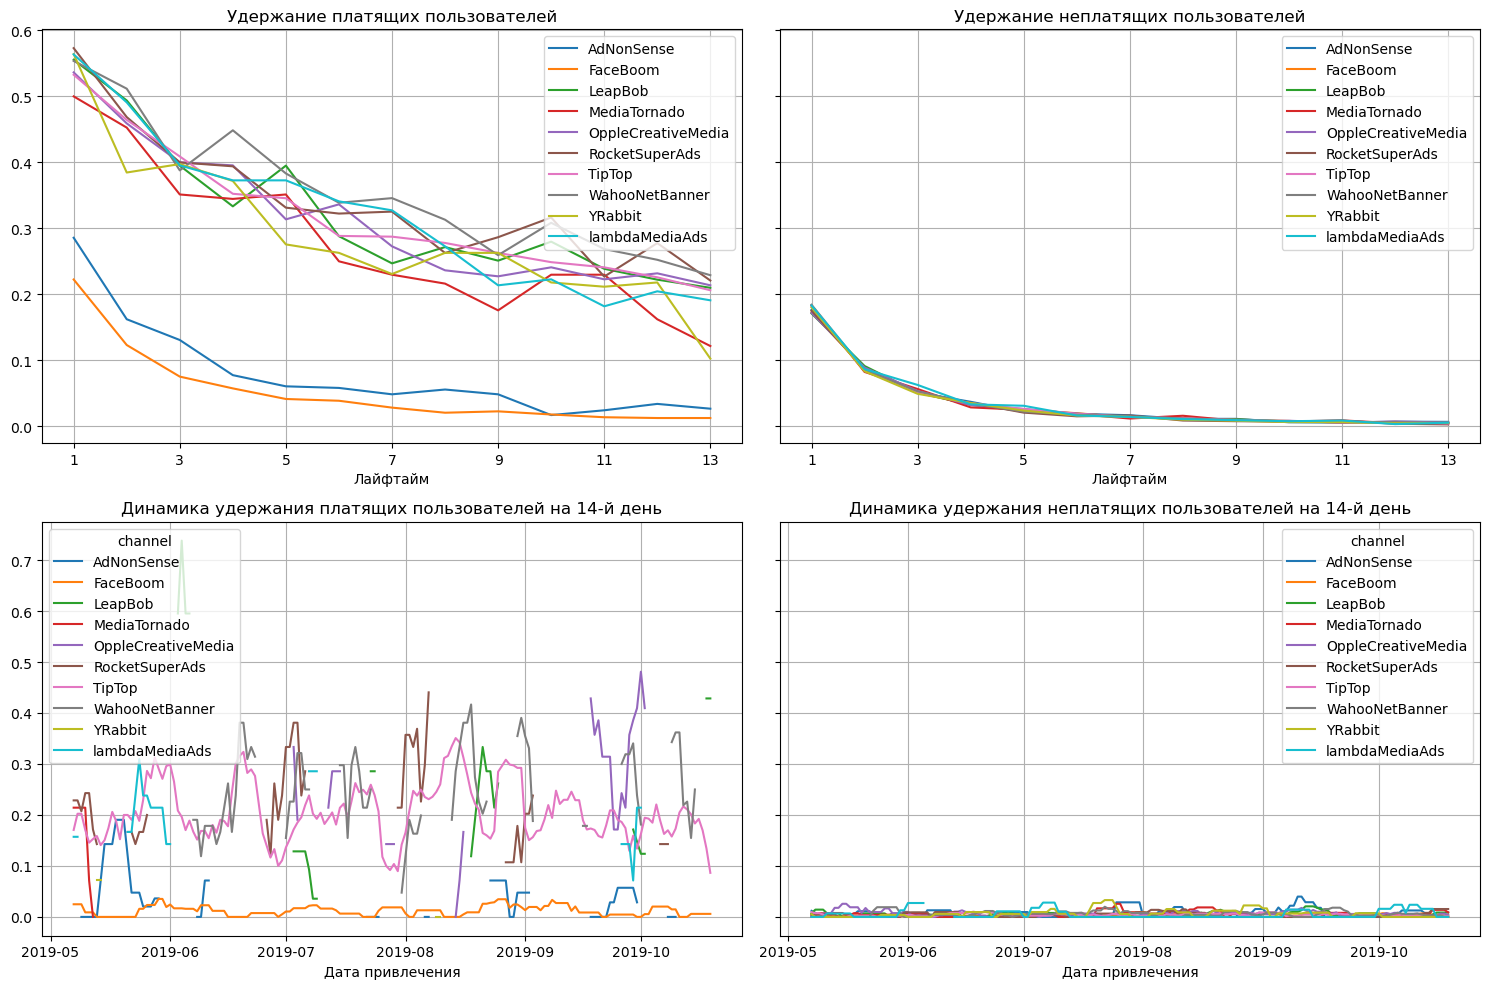

Удержание каналов FaceBoom и AdNonSense заметно ниже, чем у прочих(а именно эти каналы по предшествующему анализу являются наиболее перспективными). Отделу маркетинга стоит обратить внимание на то, почему пользовтели начинают пользоваться приложением, делают покупки, но перестают его использовать со временем.

In [79]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_org, visits, observation_date, horizon_days, dimensions= dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

display(Markdown(f"Удержание каналов FaceBoom и AdNonSense заметно ниже, чем у прочих(а именно эти каналы по \
предшествующему анализу являются наиболее перспективными). Отделу маркетинга стоит обратить внимание на то, почему\
 пользовтели начинают пользоваться приложением, делают покупки, но перестают его использовать со временем."))

<div class="alert alert-success">
  
  <b>Комментарий ревьюера v.2</b>
    
  ✔️ Видим причину не окупаемости каналов FaceBoom и AdNonSense.
</div>

### Анализ окупаемость рекламы с разбивкой по устройствам.

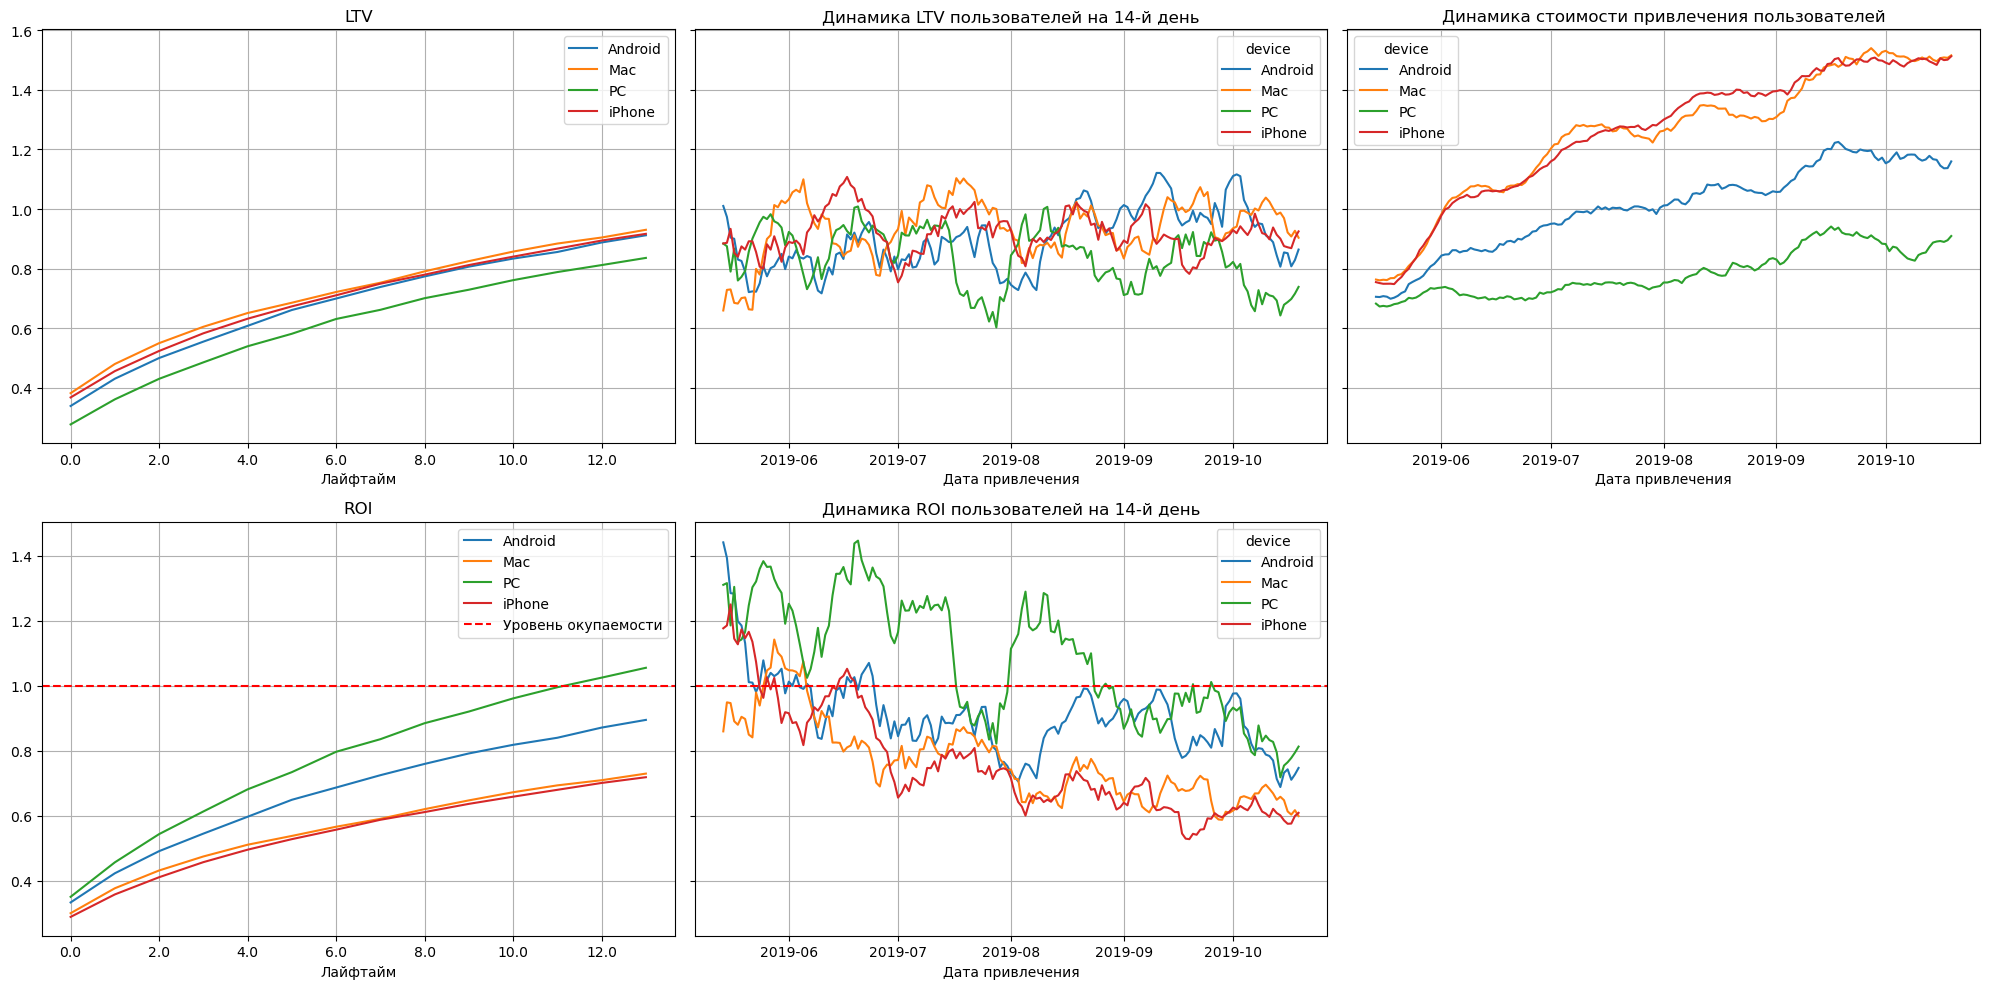

In [80]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_org, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

На графике LTV с разбивкой по устройствам мы видим, что все линии близки друг к другу. График RIO показывает, что затраты на привлечение клиентов с **iPhone и Mac** на конец исследуемого периода не окупились, хоть их линии RIO и стремятся к уровню окупаемости. Такая ситуация сложилась, потому что затраты на привлечение пользователей с iPhone и Mac превышают затраты на привлечение клиентов с **PC и Android**. Динамика RIO пользователей на 14 день снижается.

Имеет смысл проанализировать есть ли возможность сократить количество затрат на привлечение клиентов, так как они имеют тенденцию к росту у всех устройств.

### Анализ окупаемость рекламы с разбивкой по странам.

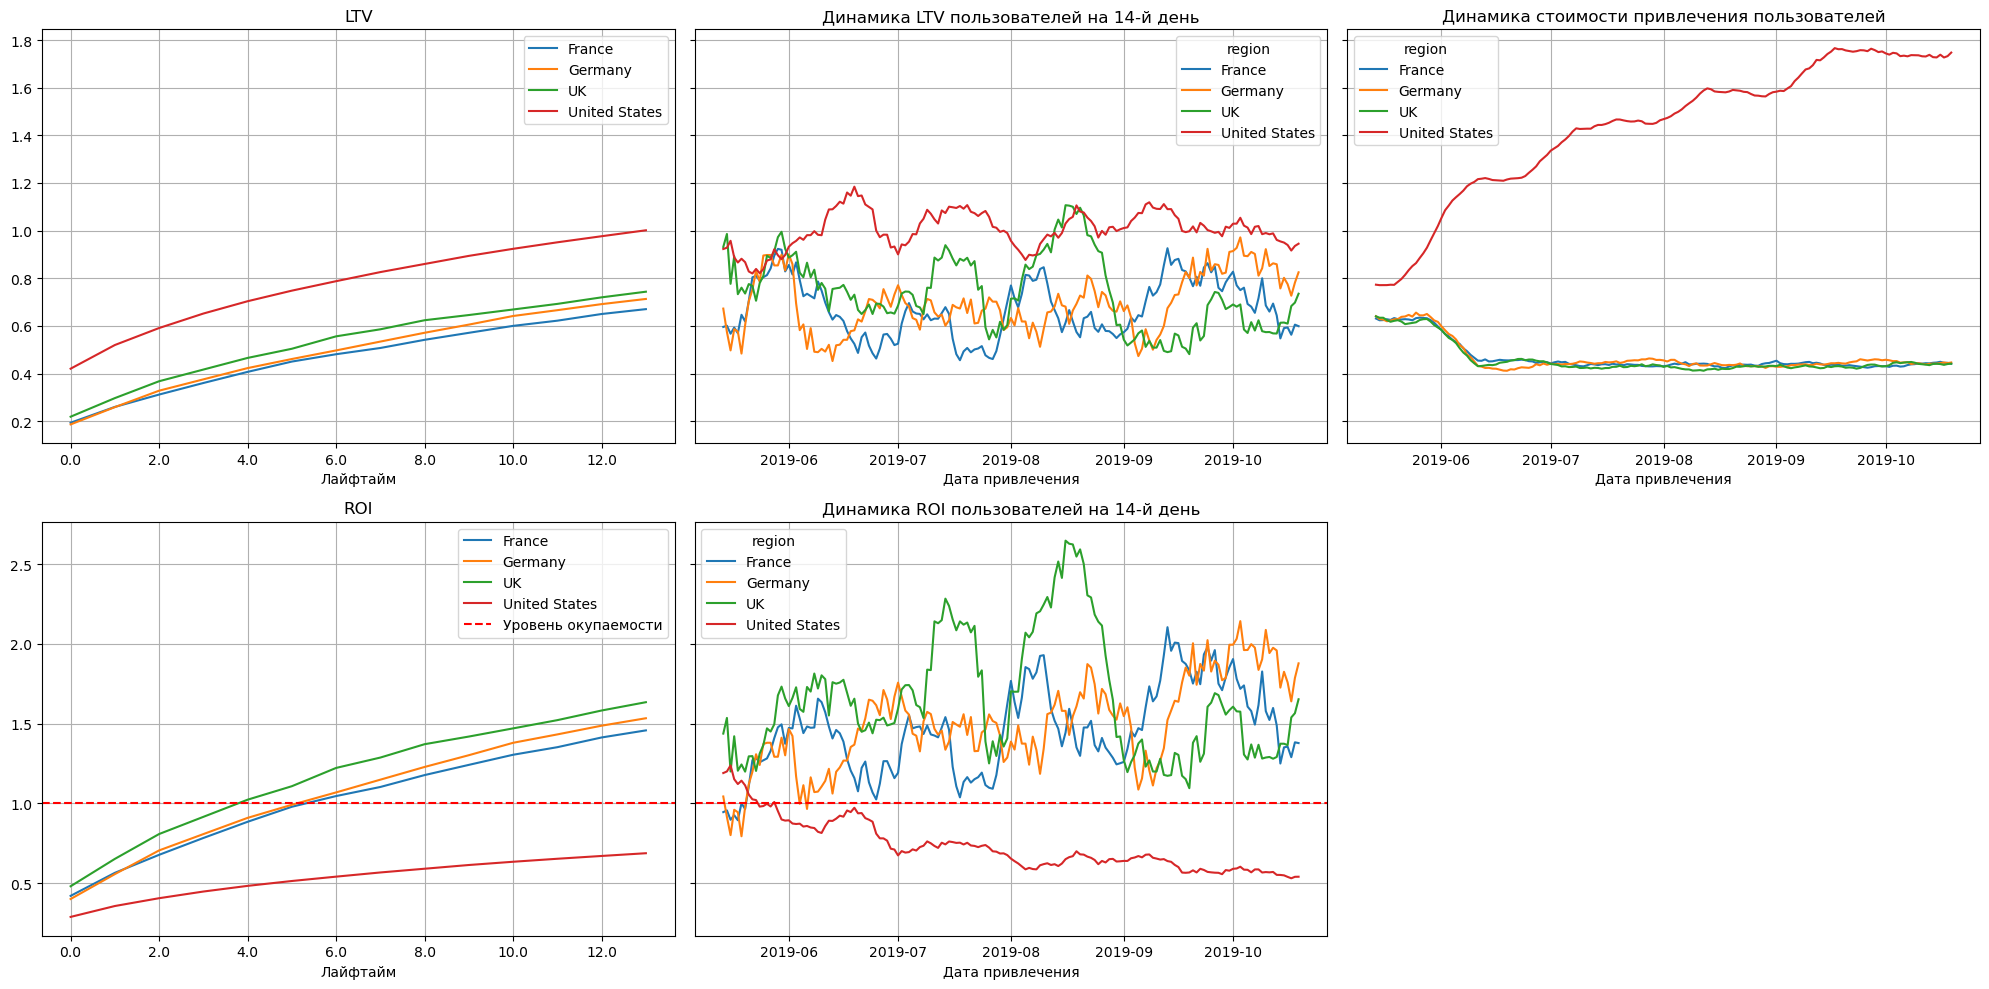

In [81]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_org, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

В данной разбивке четко выделяются клиенты из США - стоимость их привлечения растет, POI не достигает окупаемости и сильно отстает от показателей пользовтелей из других стран. При этом можно отметить, что LTV именно клиентов из США наиболее высокий, но этого не достаточно, чтобы окупить затраты.

Очевидно, что рекламные компании в США слишком дорогие и их стоимость только растет, при этом рост LTV не настолько значителен, что не дает затратам окупиться. 

### Анализ окупаемость рекламы с разбивкой по рекламным каналам.

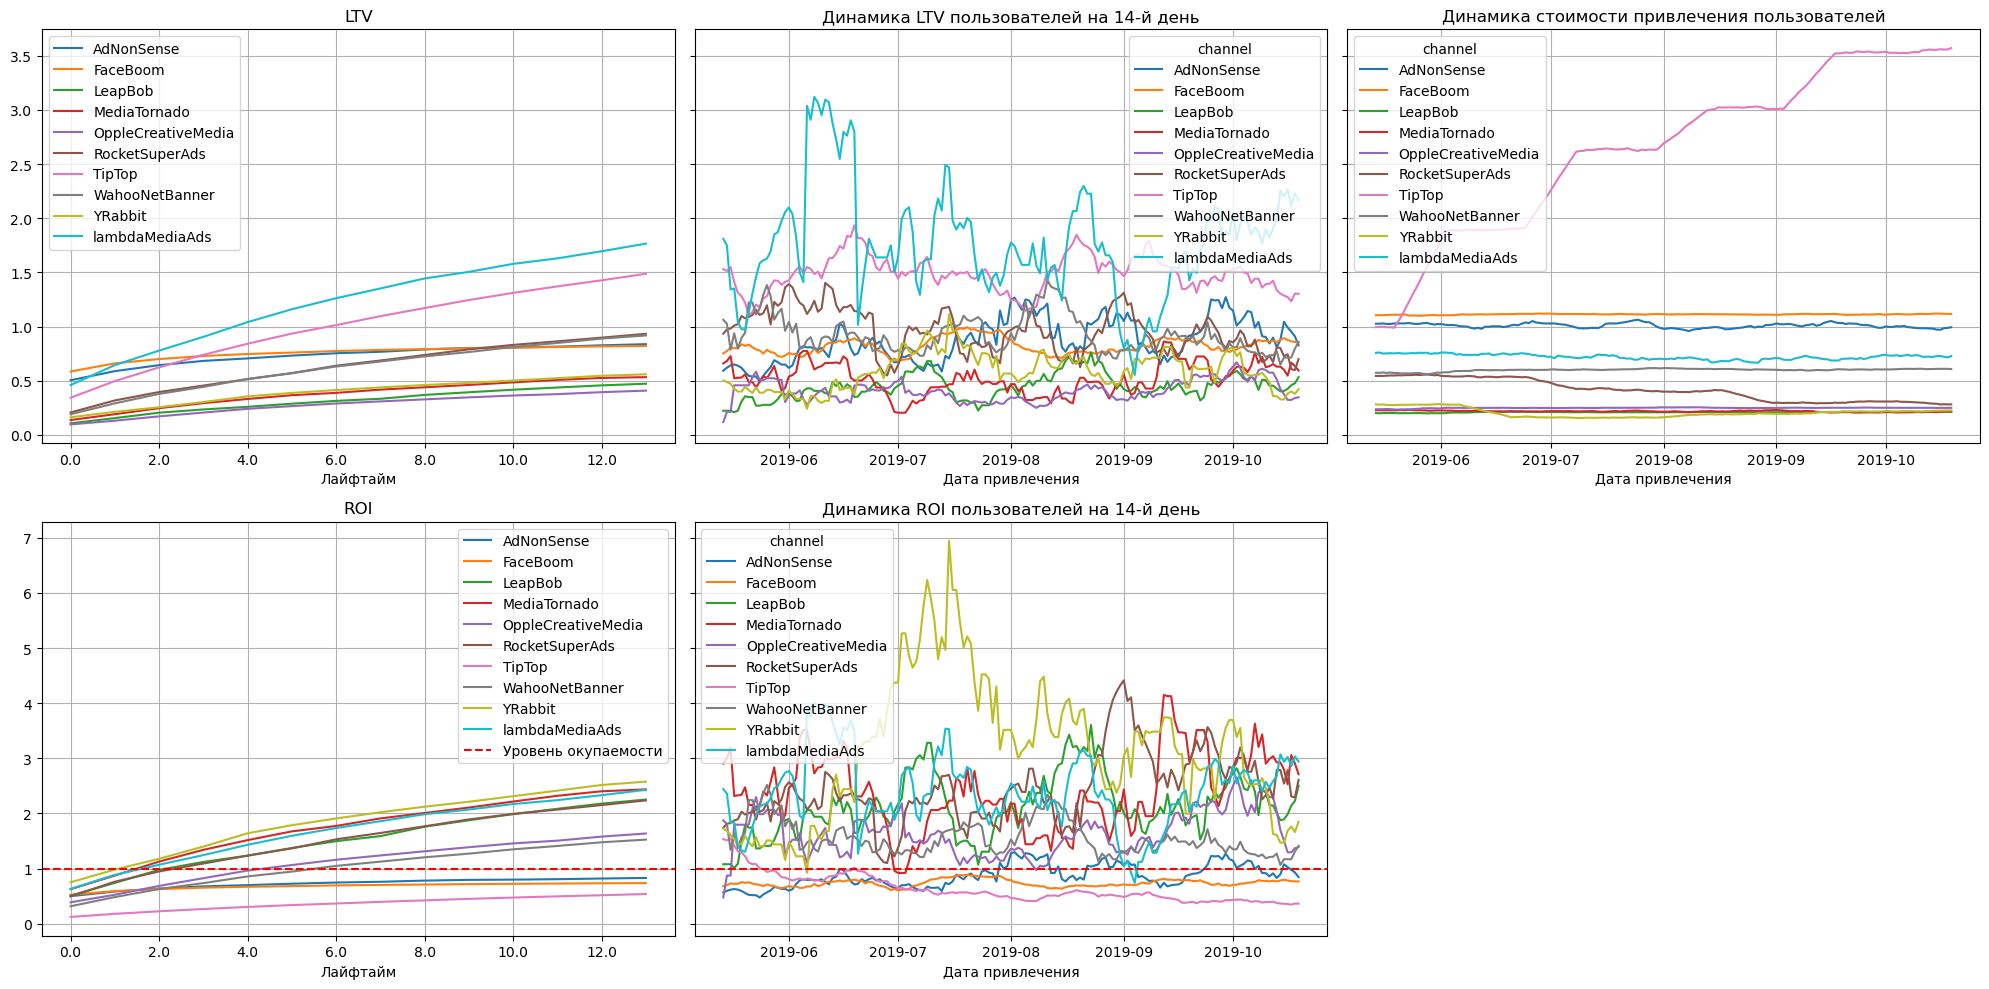

**RIO  на 14-й день**


channel
YRabbit               2.578086
MediaTornado          2.436519
lambdaMediaAds        2.428712
LeapBob               2.252399
RocketSuperAds        2.237019
OppleCreativeMedia    1.637075
WahooNetBanner        1.526304
AdNonSense            0.831337
FaceBoom              0.737790
TipTop                0.539532
Name: 13.0, dtype: float64

In [82]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_org, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

display(Markdown(f"**RIO  на 14-й день**\n"),
        roi_grouped[13].sort_values(ascending=False))


Как и было определено при анализе выше, стоимость привлечения клиентов через источник **TipTop** превышает все прочие и эти затраты не окупаются. При этом, прочие расходы достаточно стабильны. 
Кроме **TipTop** на окупаемость не вышли **FaceBoom и AdNonSense** -RIO  0,74 и 0,83 соответственно.
На фоне других выделяются **lambdaMediaAds, MediaTornado, YRabbit** с RIO выше 2,4.

Посмотрим, как изменятся графики, если не брать в рачсет клиентов, привлеченных через **TipTop**. Так же произведем разбивку по регионам, чтобы понять насколько уменьшится в таком случае количество клиентов из США - самого высокого по числу платящих клиентов региона.

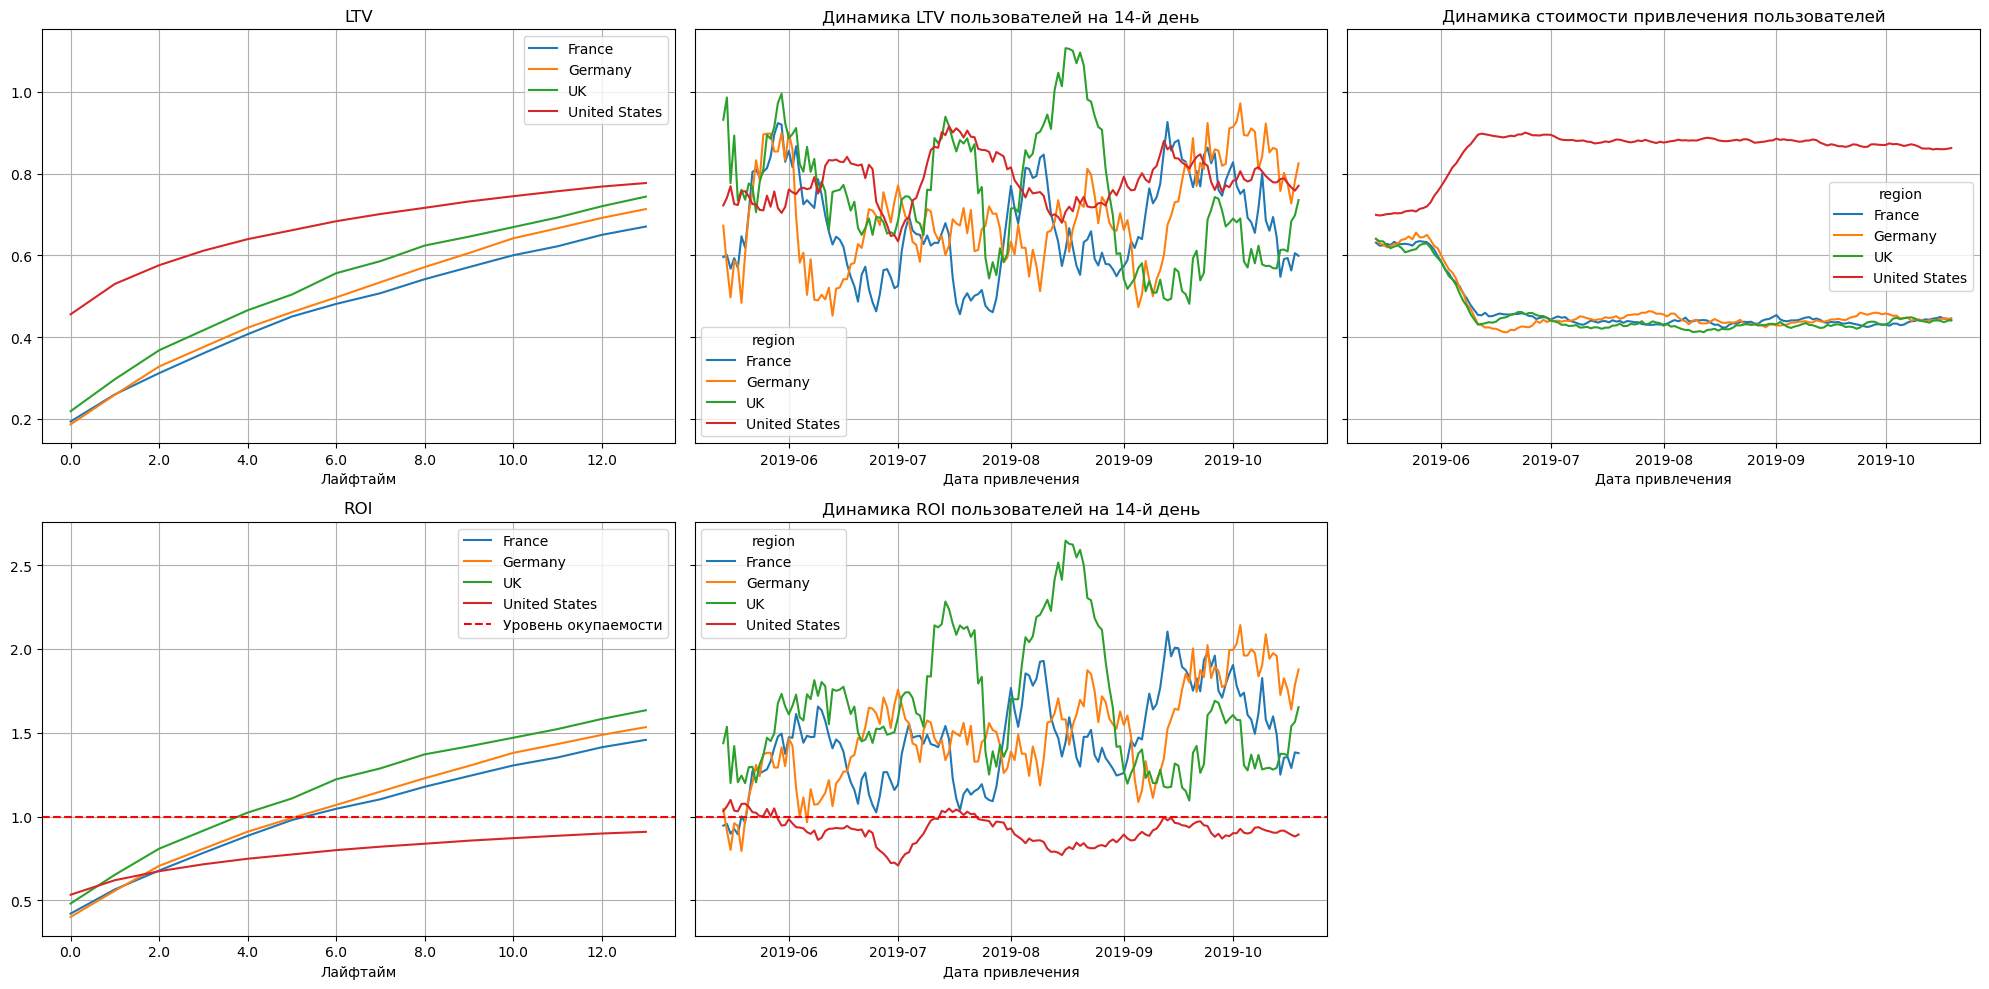

In [83]:
profiles_n_TipTop = profiles_no_org.query('channel != "TipTop"')
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_n_TipTop, orders, observation_date, horizon_days, dimensions = dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)


При исключении пользователей, пришедших из источника TipTop графики стали выглядеть намного лучше. Затраты перестали расти, и реклама окупилась на 5 день лайфтайма(кроме рекламы в США, которая почти достигает окупаемости на 13 день лайфтайма).

Таким образом менеджерам приложения Procrastinate Pro+ стоит поррекомендовать пересмотреть договор с компанией TipTop, с возможностью сокращения затрат или вообще отказаться от этого источника привлечения клиентов в пользу других, более эффективных и менее затратных.

***Выводы по разделу***

В этом разделе мы увидили, что реклама за исследуемый период не окупилась, но стримится к этому. Стоимость привлечения пользователей увеличивается и как мы увидели при анализе выше - большой вклад в это увеличение внес рекламный источник TipTop.

График динамики пользователей ROI на 14 день показывает спад и становится ниже уровня окупаемости.

Было определено , что уровень конверсии достаточно высокий, выше 80% на конец исследуемого периода. График динамики конверсии так же говорит, о том, что ее уровень растет и к концу исследуемого периода выше 80% на 14-ый день, однако, наблюдается волатильность с резкими пиками и спадами, что может свидетельствовать о непостоянстве эффективности рекламных кампаний или о различиях в поведении пользователей. Спады могут указывать на периоды, когда расходы на привлечение клиента не окупаются.

График удержания пользователей показывает падение уровня пользователей как платящих, так и не платящих. Удержание снижается со временем, что является нормальным для большинства приложений, но скорость снижения удержания может вызывать беспокойство. Это может указывать на проблемы с удовлетворенностью пользователей, ценностью продукта или послепродажным обслуживанием.

По графику Динамики удержания платящих пользователей заметна волатильность с пиками и спадами. Это может указывать на сезонные колебания или на влияние определенных маркетинговых акций и обновлений продукта.

***Компанию должно волновать искоренение проблем с удержанием в первую очередь платящих пользователей, поскольку они напрямую влияют на доходы. Низкое удержание может быть признаком необходимости улучшения функционала приложения, повышения качества контента или оптимизации пользовательского опыта. Стоит проанализировать качество трафика из различных рекламных каналов, чтобы определить, какие из них приводят более лояльных пользователей.***

При более детальном анализе конверсии и удержания пользователей с разбивкой по устройствам было определено, что наиболее высокий уровень конверсии у пользователей Mac, а наименьший - у пользователей PC.
По графикам удержания с такой разбивкой нельзя сказать, что пользователи того или иного устройства сильно отличаются по поведению.

Анализ конверсии пользователей удержания с разбивкой по странам показал, что наиболее высокий уровень конверсии у пользователей из США, при этом пользователи из Европы значительно отстают от них по уровню конверсии.

Удержание платящих пользователей из США в отличае от конверсии занимает отстающую позицию. У неплатящих пользователей показатели удержания практически не отличимы в разных странах.

***С учетом высокого уровня конверсии именно у пользователей из США, следует подробнее изучить причины отставания этих пользователей по уровню удержания от пользователей из других стран. Возможно, пользователи в США менее заинтересованы в продолжении использования продукта или менее удовлетворены им. Может быть, после первоначальной покупки пользователи сталкиваются с проблемами, которые приводят к оттоку. Низкое удержание может также свидетельствовать о том,что продукт или услуга не полностью соответствует ожиданиям американских пользователей. Успешная реклама,привлекшая большое количество польльзователей, могла преукрасить функционал приложения.***

На графике LTV с разбивкой по устройствам мы видим, что все линии близки друг к другу. График RIO показывает, что затраты на привлечение клиентов с **iPhone и Mac** на конец исследуемого периода не окупились, хоть их линии RIO и стремятся к уровню окупаемости. Такая ситуация сложилась, потому что затраты на привлечение пользователей с **iPhone и Mac** превышают затраты на привлечение клиентов с **PC и Android**. Динамика RIO пользователей на 14 день снижается.

***Имеет смысл проанализировать есть ли возможность сократить количество затрат на привлечение клиентов, так как они имеют тенденцию к росту у всех устройств.***


При анализе клиентов разбивкой по регионам выделяются клиенты из США - стоимость их привлечения растет, POI не достигает окупаемости и сильно отстает от показателей пользовтелей из других стран. При этом можно отметить, что LTV именно клиентов из США наиболее высокий, но этого не достаточно, чтобы окупить затраты.

***Очевидно, что рекламные компании в США слишком дорогие и их стоимость только растет, при этом рост LTV не настолько значителен, что не дает затратам окупиться.***

Как и было определено при анализе выше, стоимость привлечения клиентов через источник **TipTop** превышает все прочие и эти затраты не окупаются. При этом, прочие расходы достаточно стабильны. Кроме TipTop на окупаемость не вышли **FaceBoom и AdNonSense** -RIO 0,74 и 0,83 соответственно.

На фоне других выделяются **lambdaMediaAds, MediaTornado, YRabbit с RIO выше 2,4**.

При исключении пользователей, пришедших из источника TipTop графики стали выглядеть намного лучше. Затраты перестали расти, и реклама окупилась на 5 день лайфтайма (кроме рекламы в США, которая почти достигает окупаемости на 13 день лайфтайма).

***Таким образом менеджерам приложения Procrastinate Pro+ стоит поррекомендовать пересмотреть договор с компанией TipTop, с возможностью сокращения затрат или вообще отказаться от этого источника привлечения клиентов в пользу других, более эффективных и менее затратных.***

## Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**Общий вывод**

В первом разделе были изучены исходные данные и определен ход последующих действий во время предобработки. Так, наименования столбцов данных были приведены к принятому формату, была проведена проверка на наличие явных и неявных дубликатов.

В следующем разделе были заданы функции для дальнейшего анализа.

В ходе исследовательского анализа данных было определено, что доля среди платящих пользователей в **Америке - 78%**, а на представленные страны Европы приходится всего около 20%. Из этого можно сделать предположение, что реклама в Европейских странах значительно менее эффективна или недостаточна, нежеле в Соединенных Штатах Америки. 

Максимальное число пользователей предпочитают **iPhone**. Возможно это говорит о сложившейся тенденции больше использовать сотовые телефоны недели компьютеры. Однако, следует более подробно изучить причины отставания притока клиентов, пользующихся телефонами с операционной системой **Android.** Возможно, приложение под **Android** работает менее стабильно, с ошибками или с меньшим количеством функций.

При анализе количества привлеченных клиентов тем или иным источником было сделано следующее заключение: максимальное число пользователей привлечены **FaceBoom**, а доля платящих пользователей привлеченных этим источников  от общего числа - 12%.

Следует отметить так же компании **AdNonSense и lambdaMediaAds**. Общее количество привлеченных клиентов через них не велико, однако платящих клиентов из этого числа -11% и 10 % соответственно, что может говорить об их высоком потенциале.

При анализе затрат на маркетинг были определены следующие выводы:
- Общая сумма расходов на рекламу составляет 105497.3. 
- Больше всего расходов приходится на рекламу от **TipTop (51.9%).** Наиболее эффективный источник привлечения клиентов-**FaceBoom** находится на втором месте по затратам на эту рекламу - 30.75% от общего числа.
- Затраты на **AdNonSense и lambdaMediaAds**, отмеченных в предыдущем разделе, как перспективные источники привлечения клиентов, весьма невелики: 3.71% и 1.48% соответственно.
- При анализе динамики затрат было определено, что у **TipTop** лидирующая по расходам позиция с двумя большими пиками в конце июня и конце сентября, возможно в это время проводились рекламные компании. При этом, можно отметить, что на начало исследуемого периода расходы на рекламу этого источника были ниже, чем у **FaceBoom,** но уже в середине мая ситуация изменилась. Компания **TipTop** могла изменить расценки по стоимости привлечения клиентов.
- К концу исследуемого периода расходы на ремламу от многих компаний стали падать.
- Средняя стоимость одного пользователя, привлеченного **TipTop** превышает вторую по величине затрат позицию в 2,4 раза.

В заключительном разделе мы увидили, что реклама за исследуемый период не окупилась, но стримится к этому. Стоимость привлечения пользователей увеличивается и как мы увидели при анализе выше - большой вклад в это увеличение внес рекламный источник TipTop.

График динамики пользователей ROI на 14 день показывает спад и становится ниже уровня окупаемости.

Было определено , что уровень конверсии достаточно высокий, выше 80% на конец исследуемого периода. График динамики конверсии так же говорит, о том, что ее уровень растет и к концу исследуемого периода выше 80% на 14-ый день, однако, наблюдается волатильность с резкими пиками и спадами, что может свидетельствовать о непостоянстве эффективности рекламных кампаний или о различиях в поведении пользователей. Спады могут указывать на периоды, когда расходы на привлечение клиента не окупаются.

График удержания пользователей показывает падение уровня пользователей как платящих, так и не платящих. Удержание снижается со временем, что является нормальным для большинства приложений, но скорость снижения удержания может вызывать беспокойство. Это может указывать на проблемы с удовлетворенностью пользователей, ценностью продукта или послепродажным обслуживанием.

По графику Динамики удержания платящих пользователей заметна волатильность с пиками и спадами. Это может указывать на сезонные колебания или на влияние определенных маркетинговых акций и обновлений продукта.

Компанию должно волновать искоренение проблем с удержанием в первую очередь платящих пользователей, поскольку они напрямую влияют на доходы. Низкое удержание может быть признаком необходимости улучшения функционала приложения, повышения качества контента или оптимизации пользовательского опыта

При более детальном анализе конверсии и удержания пользователей с разбивкой по устройствам было определено, что наиболее высокий уровень конверсии у пользователей Mac, а наименьший - у пользователей PC.
По графикам удержания с такой разбивкой нельзя сказать, что пользователи того или иного устройства сильно отличаются по поведению.

Анализ конверсии пользователей удержания с разбивкой по странам показал, что наиболее высокий уровень конверсии у пользователей из США, при этом пользователи из Европы значительно отстают от них по уровню конверсии.

Удержание платящих пользователей из США в отличае от конверсии занимает отстающую позицию. У неплатящих пользователей показатели удержания практически не отличимы в разных странах.

С учетом высокого уровня конверсии именно у пользователей из США, следует подробнее изучить причины отставания этих пользователей по уровню удержания от пользователей из других стран. Возможно, пользователи в США менее заинтересованы в продолжении использования продукта или менее удовлетворены им. Может быть, после первоначальной покупки пользователи сталкиваются с проблемами, которые приводят к оттоку. Низкое удержание может также свидетельствовать о том,что продукт или услуга не полностью соответствует ожиданиям американских пользователей. Успешная реклама,привлекшая большое количество польльзователей, могла преукрасить функционал приложения

На графике LTV с разбивкой по устройствам мы видим, что все линии близки друг к другу. График RIO показывает, что затраты на привлечение клиентов с **iPhone и Mac** на конец исследуемого периода не окупились, хоть их линии RIO и стремятся к уровню окупаемости. Такая ситуация сложилась, потому что затраты на привлечение пользователей с **iPhone и Mac** превышают затраты на привлечение клиентов с **PC и Android**. Динамика RIO пользователей на 14 день снижается.


При анализе клиентов разбивкой по регионам выделяются клиенты из США - стоимость их привлечения растет, POI не достигает окупаемости и сильно отстает от показателей пользовтелей из других стран. При этом можно отметить, что LTV именно клиентов из США наиболее высокий, но этого не достаточно, чтобы окупить затраты.

Очевидно, что рекламные компании в США слишком дорогие и их стоимость только растет, при этом рост LTV не настолько значителен, что не дает затратам окупиться

Как и было определено при анализе выше, стоимость привлечения клиентов через источник **TipTop** превышает все прочие и эти затраты не окупаются. При этом, прочие расходы достаточно стабильны. Кроме TipTop на окупаемость не вышли **FaceBoom и AdNonSense** -RIO 0,74 и 0,83 соответственно.

На фоне других выделяются **lambdaMediaAds, MediaTornado, YRabbit с RIO выше 2,4**.

При исключении пользователей, пришедших из источника TipTop графики стали выглядеть намного лучше. Затраты перестали расти, и реклама окупилась на 5 день лайфтайма (кроме рекламы в США, которая почти достигает окупаемости на 13 день лайфтайма).


**Общие рекоммендации для отдела маркетинга:**

- Менеджерам приложения Procrastinate Pro+ стоит поррекомендовать пересмотреть договор с компанией TipTop, с возможностью сокращения затрат или вообще отказаться от этого источника привлечения клиентов в пользу других, более эффективных и менее затратных.

- Низкое удержание требует проверки качества функционала приложения, улучшения его по мере необходимости. Так же может потребоваться повысить качество контента или оптимизировать пользовательский опыт. При этом особенный упор следует сделать на предпочтения пользователей из США.

- Так же хочется отметить **lambdaMediaAds**. Данный источник показал хорошую долю платящих клиентов и общего числа пользователей, привлеченных им, так же низкий уровень затрат и быструю окупаемость. Возможно, управлению стоит больше вложиться в этот источник привлечения клиентов.

<div style="border:solid black 2px; padding: 20px">
     
  <b>Чек-лист доработок</b>
    
  
  [x] Убрать канал "organic" из анализа причин неудовлетворительной окупаемости рекламных затрат.
    
  [x] Проанализировать конверсию и удержание пользователей по странам\каналам\устройствам.
    
  [x] Пересмотреть общий вывод (добавить больше конкретики) и альтернативные рекомендации отделу маркетинга.
    
Жду твой проект на повторное ревью. Не стесняйся оставлять комментарии и задавать вопросы. Удачи! Все получится.
</div>